I perform feature selection on train data (HMP) using just the replicated features in Gajer

First let's identify what features are common in between 

In [25]:
#list of all features common between HMP and Gajer
lst  = ['SERIAL','PID','MENSTRUATION','NUGENT_CLASS','CST_HL',
                                   'Lactobacillus_iners','Lactobacillus_crispatus',
                                   'Lactobacillus_jensenii','Lactobacillus_gasseri',
                                  'Lactobacillus_vaginalis','Parvimonas_micra',
                                  'Enterococcus_faecalis','Finegoldia_magna',
                                  'Gemella','Sneathia_sanguinegens','Atopobium_minutum',
                                  'Atopobium_vaginae','Corynebacterium_accolens',
                                  'Prevotella_bivia','Prevotella_buccalis',
                                  'Prevotella_disiens','Prevotella_melaninogenica',
                                  'Gardnerella_vaginalis','Megasphaera_sp._type_1',
                                  'Megasphaera_sp._type_2','Staphylococcus_aureus',
                                  'Staphylococcus_epidermidis','Staphylococcus_haemolyticus',
                                  'Staphylococcus_hominis','Staphylococcus_lugdunensis',
                                  'Staphylococcus_warneri','Aerococcus_christensenii',
                                  'Streptococcus_agalactiae','Streptococcus_anginosus',
                                  'Dialister_sp._type_2','Anaerococcus_tetradius',
                                  'Peptoniphilus_lacrimalis','Veillonella_montpellierensis',
                                  'Peptoniphilus_asaccharolyticus','Mobiluncus_curtisii',
                                  'Streptococcus_salivarius','Dialister_sp._type_3',
                                  'Anaerococcus_vaginalis','Peptoniphilus_harei',
                                  'Streptococcus_oralis','Streptococcus_parasanguinis',
                                  'Veillonella_parvula','Bifidobacterium_breve',
                                  'Actinomyces_neuii','Porphyromonas_bennonis',
                                  'Eubacterium_rectale','Clostridium_colicanis',
                                  'Dialister_propionicifaciens','Veillonella_atypica',
                                  'Porphyromonas_sp._type_1','Campylobacter_ureolyticus',
                                  'Varibaculum_cambriense','Fusobacterium_nucleatum',
                                  'Bifidobacterium_longum','Mobiluncus_mulieris',
                                  'Porphyromonas_uenonis','Alloscardovia_omnicolens',
                                  'Actinomyces_urogenitalis','Peptostreptococcus_stomatis',
                                  'Acinetobacter_calcoaceticus','Streptococcus_sanguinis',
                                  'Bacteroides_uniformis','Aerococcus_viridans']

In [26]:
# HMP data
import warnings
# Suppress all warnings globally
warnings.filterwarnings("ignore")
from QE_functions import *
df_hmp = df_abundance_nugent(filename=None, log=True, rel_abund=False, zscore=False,cst=True, metabolomics=False)
# Gajer data
df_gajer = Gajer_preprocessing_data(log=True, rel_abund=False, zscore=False)
#filtering: select all common hmp and gajer features 
df_hmp_filtered = get_columns_w_names(df_hmp,lst)
#df_hmp_filtered_only_bacteria = df_hmp_filtered.iloc[:,3:-1] #filtered data with just bacterial species

log transformed data
log transformed data


For BMES we want to plot just for CST-III. Thus do the feature selection only for CST-III. For train on whole HMP and test on Gajer, we can do feature selection on whole HMP data. 

In [155]:
X, y = menstruation_xblock_y_premensesX(df_hmp_filtered,menses_included=False,four_labels=False, multistability=False) #X=premenses data
print(np.unique(y, return_counts=True))
X, y = drop_blocks(X,y,thres=4)
(X_1, y_1), (X_2, y_2), (X_3, y_3), (X_4, y_4), (X_5, y_5) = split_blocks_by_CST_most_frequent(X, y, equal_selection=False)
df_3 = flatten(X_3)

Number of x_blocks (X): 205
Shape of labels (y): (205,)
(array([0, 1]), array([122,  83]))
Filtered number of x_blocks: 146
Filtered shape of labels (y): (146,)
Number of 1s: 59
Number of 0s: 87
length of X_1 and y_1:  29 29
length of X_2 and y_2:  20 20
length of X_3 and y_3:  41 41
length of X_4 and y_4:  43 43
length of X_5 and y_5:  4 4


# Perform feature selection on df_3 (CST-III)

# Elastic Net Feature Selection 

In [9]:
#save for elastic net
matlab_ddm_save_data(df_3,y_3)

In [27]:
from Elastic_Net_functions import *
xblock, yblock, xnames, patients = read_files('HMP_common_features_w_Gajer/CST-III')
num_runs = 200 #total number of sample subsets and iterations
all_disease_data, all_cntrl_data = resample_creation(xblock, yblock, num_runs=num_runs, r=0.8)
all_B_min = elastic_network(all_disease_data, all_cntrl_data, num_runs=num_runs) 
#a = pd.DataFrame(all_B_min)
#a.to_csv('/Users/bonakdar/Desktop/all_B_min.csv')

run number: 0
run number: 1
run number: 2
run number: 3
run number: 4
run number: 5
run number: 6
run number: 7
run number: 8
run number: 9
run number: 10
run number: 11
run number: 12
run number: 13
run number: 14
run number: 15
run number: 16
run number: 17
run number: 18
run number: 19
run number: 20
run number: 21
run number: 22
run number: 23
run number: 24
run number: 25
run number: 26
run number: 27
run number: 28
run number: 29
run number: 30
run number: 31
run number: 32
run number: 33
run number: 34
run number: 35
run number: 36
run number: 37
run number: 38
run number: 39
run number: 40
run number: 41
run number: 42
run number: 43
run number: 44
run number: 45
run number: 46
run number: 47
run number: 48
run number: 49
run number: 50
run number: 51
run number: 52
run number: 53
run number: 54
run number: 55
run number: 56
run number: 57
run number: 58
run number: 59
run number: 60
run number: 61
run number: 62
run number: 63
run number: 64
run number: 65
run number: 66
run n

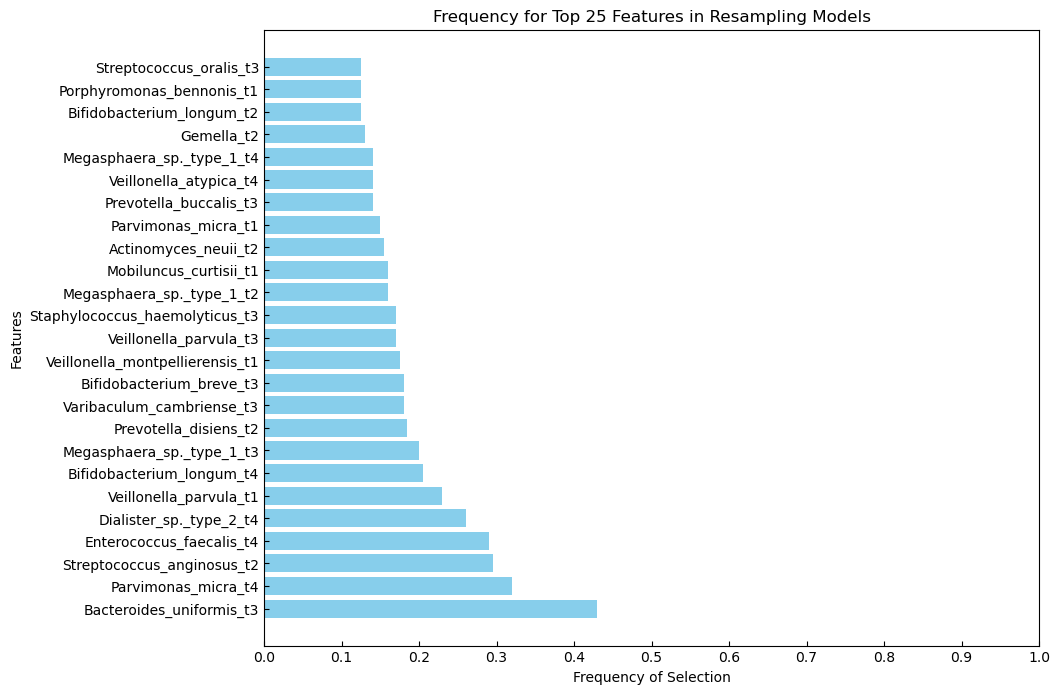

Best number of features =  34


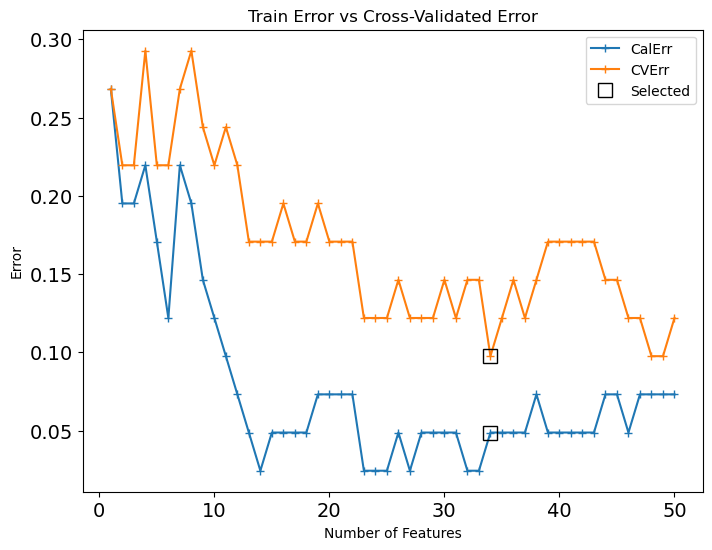

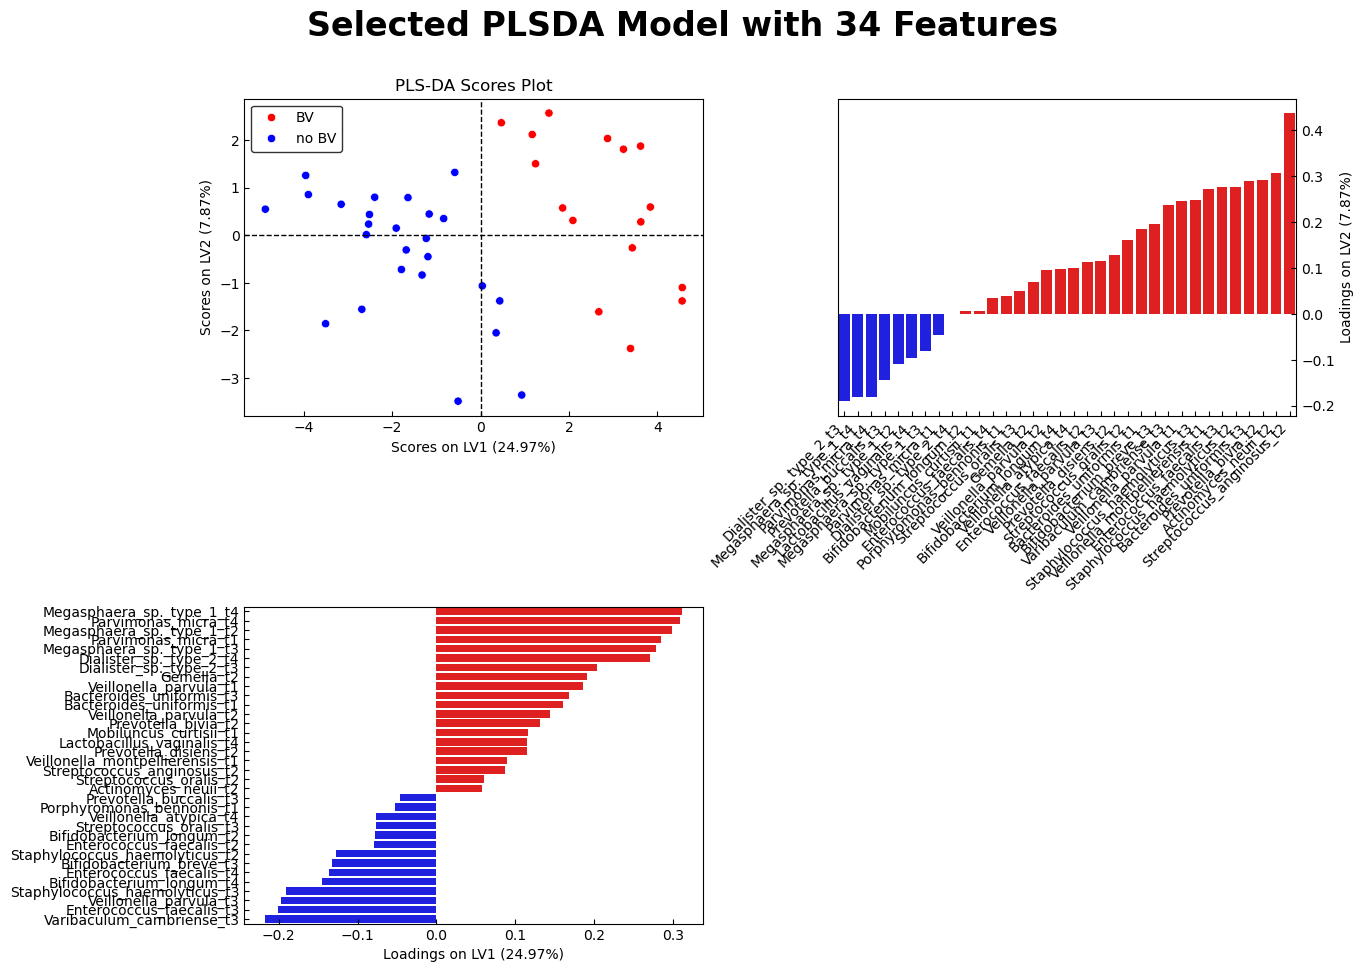

Calibration Error:  [0.04878049]
CV Error:  [0.09756098]
Random feature selections beat selected features 0.0% of the times
T-statistic: -3.9248763805477034
P-value: 9.895690566258795e-05


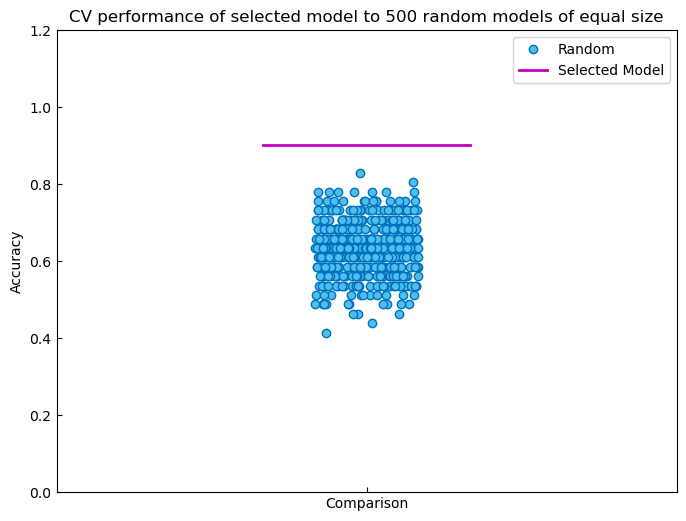

In [28]:
fr_sel_min = freq_of_selection(all_B_min,xnames)
plot_top_features(fr_sel_min,numb_of_features=25)
best_sel, tr_err_lst, te_err_lst = find_best_num_features(xblock, yblock, fr_sel_min, n_splits=5, fraction_of_features=0.2)
plot_CV_Cal_err(best_sel, tr_err_lst, te_err_lst)
PLSDA_plots(best_sel, fr_sel_min, xblock, yblock, tr_err_lst, te_err_lst, num_components=2, orthogonalize=True)
rand_CV_accuracy, CV_accuracy_sel = random_best_comparison(xblock, yblock, te_err_lst, best_sel, n_splits=5, num_rand_sets=500)
plot_cv_accuracy(rand_CV_accuracy, CV_accuracy_sel)

In [10]:
fr_sel_min.to_csv('/Users/bonakdar/Desktop/fr_sel_min.csv')

In [29]:
elastic_net_selected_features = fr_sel_min.index[:34]
elastic_net_selected_features

Index(['Bacteroides_uniformis_t3', 'Parvimonas_micra_t4',
       'Streptococcus_anginosus_t2', 'Enterococcus_faecalis_t4',
       'Dialister_sp._type_2_t4', 'Veillonella_parvula_t1',
       'Bifidobacterium_longum_t4', 'Megasphaera_sp._type_1_t3',
       'Prevotella_disiens_t2', 'Varibaculum_cambriense_t3',
       'Bifidobacterium_breve_t3', 'Veillonella_montpellierensis_t1',
       'Veillonella_parvula_t3', 'Staphylococcus_haemolyticus_t3',
       'Megasphaera_sp._type_1_t2', 'Mobiluncus_curtisii_t1',
       'Actinomyces_neuii_t2', 'Parvimonas_micra_t1', 'Prevotella_buccalis_t3',
       'Veillonella_atypica_t4', 'Megasphaera_sp._type_1_t4', 'Gemella_t2',
       'Bifidobacterium_longum_t2', 'Porphyromonas_bennonis_t1',
       'Streptococcus_oralis_t3', 'Prevotella_bivia_t2',
       'Enterococcus_faecalis_t2', 'Staphylococcus_haemolyticus_t2',
       'Streptococcus_oralis_t2', 'Enterococcus_faecalis_t3',
       'Lactobacillus_vaginalis_t4', 'Veillonella_parvula_t2',
       'Bacteroides_

In [10]:
xblock_top_elastic_net = xblock.loc[:,fr_sel_min.index[:34].values]


In [79]:
all_model_evaluation(xblock_top_elastic_net,y_3,test=True,n_splits=3)

accuracy  precision  recall    f1  specificity   mse  \
Random Forest            0.80       0.79    0.77  0.74         0.84  0.20   
Logistic Regression      0.81       0.84    0.71  0.71         0.88  0.19   
Linear SVM               0.76       0.68    0.71  0.69         0.80  0.24   
RBF SVM                  0.78       0.76    0.77  0.72         0.81  0.22   
K-Nearest Neighbors      0.78       0.76    0.77  0.72         0.80  0.22   
Gradient Boosting        0.71       0.67    0.76  0.68         0.69  0.29   
PLS-DA                   0.83       0.84    0.77  0.77         0.88  0.17   
Random Guess             0.61       0.00    0.00  0.00         1.00  0.39   

                      auc  
Random Forest        0.89  
Logistic Regression  0.83  
Linear SVM           0.79  
RBF SVM              0.92  
K-Nearest Neighbors  0.89  
Gradient Boosting    0.75  
PLS-DA               0.96  
Random Guess         0.70

# mRMR Feature Selection 

In [30]:
import mrmr

In [31]:
# select top 10 features using mRMR
from mrmr import mrmr_classif
mrmr_selected_features = mrmr_classif(X=df_3, y=y_3, K=20)

100%|█████████████████████████████████████████████| 20/20 [00:00<00:00, 62.93it/s]


In [170]:
mrmr_selected_features

['Parvimonas_micra_t4',
 'Prevotella_disiens_t3',
 'Veillonella_montpellierensis_t1',
 'Bacteroides_uniformis_t3',
 'Enterococcus_faecalis_t4',
 'Megasphaera_sp._type_1_t4',
 'Dialister_sp._type_2_t4',
 'Streptococcus_anginosus_t2',
 'Veillonella_parvula_t3',
 'Megasphaera_sp._type_1_t2',
 'Parvimonas_micra_t1',
 'Megasphaera_sp._type_1_t3',
 'Lactobacillus_iners_t3',
 'Veillonella_parvula_t1',
 'Megasphaera_sp._type_1_t1',
 'Atopobium_vaginae_t4',
 'Varibaculum_cambriense_t3',
 'Parvimonas_micra_t3',
 'Dialister_sp._type_2_t1',
 'Bifidobacterium_longum_t4']

In [32]:
for i in mrmr_selected_features:
    if i in elastic_net_selected_features:
        print(i, True)
    else:
        print(i,False)

Parvimonas_micra_t4 True
Prevotella_disiens_t3 False
Veillonella_montpellierensis_t1 True
Bacteroides_uniformis_t3 True
Enterococcus_faecalis_t4 True
Megasphaera_sp._type_1_t4 True
Dialister_sp._type_2_t4 True
Streptococcus_anginosus_t2 True
Veillonella_parvula_t3 True
Megasphaera_sp._type_1_t2 True
Parvimonas_micra_t1 True
Megasphaera_sp._type_1_t3 True
Lactobacillus_iners_t3 False
Veillonella_parvula_t1 True
Megasphaera_sp._type_1_t1 False
Atopobium_vaginae_t4 False
Varibaculum_cambriense_t3 True
Parvimonas_micra_t3 False
Dialister_sp._type_2_t1 False
Bifidobacterium_longum_t4 True


In [41]:
xblock_top_mrmr = xblock.loc[:,mrmr_selected_features]
all_model_evaluation(xblock_top_mrmr,y_3,test=True,n_splits=3)

accuracy  precision  recall    f1  specificity   mse  \
Random Forest            0.83       0.83    0.77  0.77         0.88  0.17   
Logistic Regression      0.81       0.84    0.71  0.71         0.88  0.19   
Linear SVM               0.76       0.68    0.71  0.69         0.80  0.24   
RBF SVM                  0.78       0.76    0.77  0.72         0.81  0.22   
K-Nearest Neighbors      0.78       0.76    0.77  0.72         0.80  0.22   
Gradient Boosting        0.71       0.67    0.76  0.68         0.69  0.29   
PLS-DA                   0.83       0.84    0.77  0.77         0.88  0.17   
Random Guess             0.61       0.00    0.00  0.00         1.00  0.39   

                      auc  
Random Forest        0.90  
Logistic Regression  0.83  
Linear SVM           0.79  
RBF SVM              0.92  
K-Nearest Neighbors  0.89  
Gradient Boosting    0.75  
PLS-DA               0.96  
Random Guess         0.70

# VIP Feature Selection 

In [33]:
import warnings
# Suppress all warnings globally
warnings.filterwarnings("ignore")
from QE_functions import *
model = plsda_model(df_3,y_3)
vip_features, vip_df = function_vip(df_3,y_3,model,thres=1.3)

Cross-validated accuracies: [0.6666666666666666, 0.875, 0.875, 0.75, 0.25]
Mean cross-validated accuracy: 0.68


In [51]:
xblock_top_vip = xblock.loc[:,vip_features.values]
all_model_evaluation(xblock_top_vip,y_3,test=True,n_splits=5)

accuracy  precision  recall    f1  specificity   mse  \
Random Forest            0.76       0.75    0.65  0.65         0.84  0.24   
Logistic Regression      0.68       0.62    0.57  0.58         0.76  0.32   
Linear SVM               0.66       0.58    0.50  0.53         0.76  0.34   
RBF SVM                  0.68       0.55    0.68  0.60         0.68  0.32   
K-Nearest Neighbors      0.78       0.73    0.75  0.72         0.80  0.22   
Gradient Boosting        0.56       0.48    0.37  0.40         0.68  0.44   
PLS-DA                   0.76       0.77    0.70  0.72         0.80  0.24   
Random Guess             0.61       0.00    0.00  0.00         1.00  0.39   

                      auc  
Random Forest        0.75  
Logistic Regression  0.68  
Linear SVM           0.70  
RBF SVM              0.74  
K-Nearest Neighbors  0.72  
Gradient Boosting    0.58  
PLS-DA               0.75  
Random Guess         0.69

In [35]:
vip_df[vip_df['VIP']>1]

VIP
Gardnerella_vaginalis_t1       1.094995
Atopobium_vaginae_t1           1.322502
Megasphaera_sp._type_1_t1      1.604461
Aerococcus_christensenii_t1    1.220655
Parvimonas_micra_t1            1.876407
...                                 ...
Bifidobacterium_longum_t4      1.225203
Mobiluncus_mulieris_t4         1.481478
Staphylococcus_epidermidis_t4  1.224954
Porphyromonas_uenonis_t4       1.030811
Staphylococcus_warneri_t4      1.128579

[104 rows x 1 columns]

In [39]:
vip_filtered_sorted = vip_df[vip_df['VIP'] > 1].sort_values(by='VIP', ascending=False)
vip_filtered_sorted[40:60]

VIP
Prevotella_bivia_t1                1.252041
Staphylococcus_haemolyticus_t3     1.250960
Campylobacter_ureolyticus_t2       1.250941
Peptoniphilus_lacrimalis_t3        1.237985
Lactobacillus_iners_t4             1.236076
Megasphaera_sp._type_2_t1          1.235805
Streptococcus_agalactiae_t4        1.232413
Anaerococcus_tetradius_t2          1.228461
Bifidobacterium_longum_t4          1.225203
Staphylococcus_epidermidis_t4      1.224954
Aerococcus_christensenii_t1        1.220655
Gardnerella_vaginalis_t4           1.210067
Aerococcus_christensenii_t2        1.205802
Veillonella_montpellierensis_t4    1.204075
Streptococcus_parasanguinis_t1     1.203125
Prevotella_melaninogenica_t4       1.199190
Peptoniphilus_asaccharolyticus_t1  1.186316
Prevotella_buccalis_t3             1.183817
Prevotella_melaninogenica_t1       1.181820
Prevotella_bivia_t2                1.180378

# Random Forest Feature Ranking 

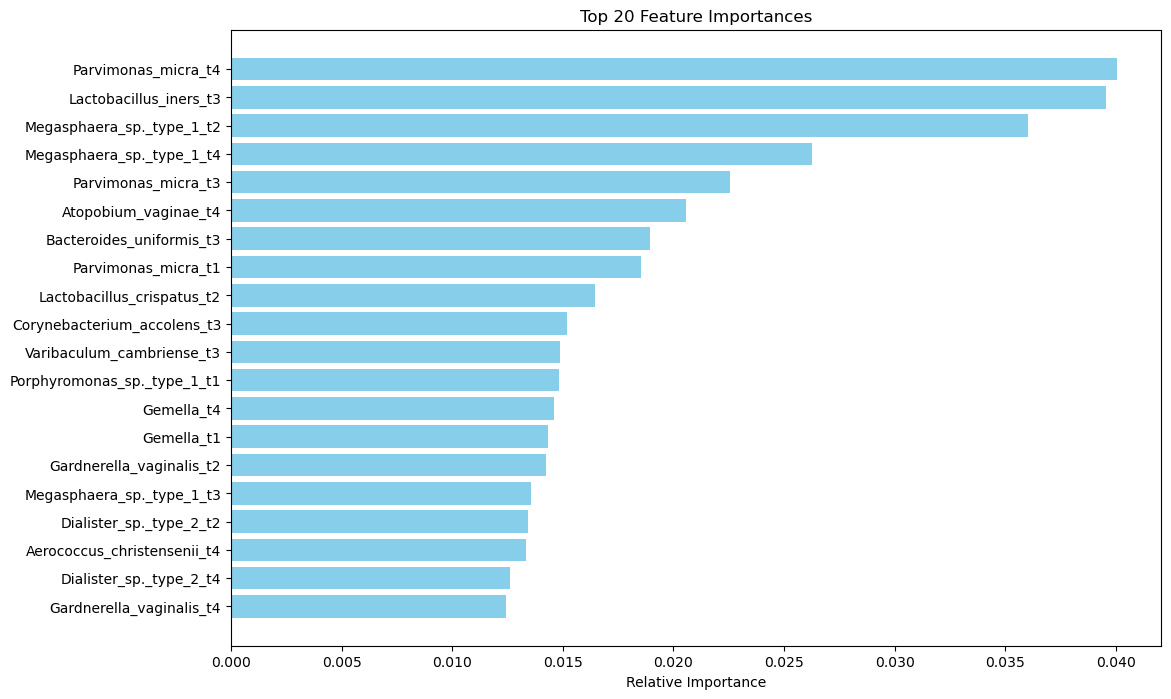

In [34]:
RF_feature_importances = RForest_top_features_plot(df_3,y_3,numb_features=20)

In [35]:
RF_feature_importances['Feature'].values[:20]

array(['Parvimonas_micra_t4', 'Lactobacillus_iners_t3',
       'Megasphaera_sp._type_1_t2', 'Megasphaera_sp._type_1_t4',
       'Parvimonas_micra_t3', 'Atopobium_vaginae_t4',
       'Bacteroides_uniformis_t3', 'Parvimonas_micra_t1',
       'Lactobacillus_crispatus_t2', 'Corynebacterium_accolens_t3',
       'Varibaculum_cambriense_t3', 'Porphyromonas_sp._type_1_t1',
       'Gemella_t4', 'Gemella_t1', 'Gardnerella_vaginalis_t2',
       'Megasphaera_sp._type_1_t3', 'Dialister_sp._type_2_t2',
       'Aerococcus_christensenii_t4', 'Dialister_sp._type_2_t4',
       'Gardnerella_vaginalis_t4'], dtype=object)

In [74]:
xblock_top_rf = xblock.loc[:,RF_feature_importances['Feature'].values[:10]]
all_model_evaluation(xblock_top_rf,y_3,test=True,n_splits=5)

accuracy  precision  recall    f1  specificity   mse  \
Random Forest            0.81       0.85    0.72  0.72         0.88  0.19   
Logistic Regression      0.71       0.62    0.70  0.65         0.72  0.29   
Linear SVM               0.68       0.61    0.70  0.64         0.68  0.32   
RBF SVM                  0.68       0.58    0.75  0.63         0.64  0.32   
K-Nearest Neighbors      0.71       0.69    0.58  0.58         0.80  0.29   
Gradient Boosting        0.68       0.71    0.65  0.61         0.72  0.32   
PLS-DA                   0.73       0.71    0.72  0.66         0.76  0.27   
Random Guess             0.61       0.00    0.00  0.00         1.00  0.39   

                      auc  
Random Forest        0.79  
Logistic Regression  0.58  
Linear SVM           0.58  
RBF SVM              0.76  
K-Nearest Neighbors  0.75  
Gradient Boosting    0.74  
PLS-DA               0.73  
Random Guess         0.69

In [42]:
RF_feature_importances[40:60]

Feature  Importance
71       Streptococcus_agalactiae_t2    0.007020
89            Prevotella_buccalis_t2    0.007020
74        Streptococcus_anginosus_t2    0.006893
68         Megasphaera_sp._type_1_t2    0.006844
108           Veillonella_atypica_t2    0.006795
101           Veillonella_parvula_t2    0.006767
164           Veillonella_parvula_t3    0.006588
193        Lactobacillus_jensenii_t4    0.006456
116    Staphylococcus_epidermidis_t2    0.006253
196         Lactobacillus_gasseri_t4    0.006156
162          Streptococcus_oralis_t3    0.006135
131        Megasphaera_sp._type_1_t3    0.006099
82               Prevotella_bivia_t2    0.006034
83   Veillonella_montpellierensis_t2    0.006018
110     Campylobacter_ureolyticus_t2    0.005803
76               Finegoldia_magna_t2    0.005765
114           Mobiluncus_mulieris_t2    0.005717
119      Actinomyces_urogenitalis_t2    0.005711
67         Lactobacillus_jensenii_t2    0.005705
174        Varibaculum_cambriense_t3    0.005704

# Create the df_3 dataframe with selected features from 4 feature selection models (combined all)

In [76]:
#list of all features selected in either of methods
lst_either  = ['SERIAL','PID','MENSTRUATION','NUGENT_CLASS','CST_HL',
                                   'Lactobacillus_iners','Lactobacillus_crispatus',
                                   'Lactobacillus_jensenii','Lactobacillus_gasseri',
                                  'Lactobacillus_vaginalis','Parvimonas_micra',
                                  'Enterococcus_faecalis','Finegoldia_magna',
                                  'Gemella','Sneathia_sanguinegens','Atopobium_minutum',
                                  'Atopobium_vaginae','Corynebacterium_accolens',
                                  'Prevotella_bivia','Prevotella_buccalis',
                                  'Prevotella_disiens',
                                  'Gardnerella_vaginalis','Megasphaera_sp._type_1',
                                  'Megasphaera_sp._type_2',
                                  'Staphylococcus_epidermidis','Staphylococcus_haemolyticus',
                                  'Staphylococcus_hominis','Staphylococcus_lugdunensis',
                                  'Staphylococcus_warneri','Aerococcus_christensenii',
                                  'Streptococcus_agalactiae','Streptococcus_anginosus',
                                  'Dialister_sp._type_2','Anaerococcus_tetradius',
                                  'Peptoniphilus_lacrimalis','Veillonella_montpellierensis',
                                  'Mobiluncus_curtisii',
                                  'Peptoniphilus_harei',
                                  'Streptococcus_oralis','Streptococcus_parasanguinis',
                                  'Veillonella_parvula','Bifidobacterium_breve',
                                  'Actinomyces_neuii','Porphyromonas_bennonis',
                                  'Eubacterium_rectale',
                                  'Veillonella_atypica',
                                  'Porphyromonas_sp._type_1','Campylobacter_ureolyticus',
                                  'Varibaculum_cambriense',
                                  'Bifidobacterium_longum','Mobiluncus_mulieris',
                                  'Actinomyces_urogenitalis','Peptostreptococcus_stomatis',
                                  'Acinetobacter_calcoaceticus',
                                  'Bacteroides_uniformis','Aerococcus_viridans']

In [90]:
#list of all features selected in more than 1 time selection
lst_either  = ['SERIAL','PID','MENSTRUATION','NUGENT_CLASS','CST_HL',
                                   'Lactobacillus_iners','Lactobacillus_crispatus',
                                   #'Lactobacillus_jensenii','Lactobacillus_gasseri',
                                  'Lactobacillus_vaginalis','Parvimonas_micra',
                                  'Enterococcus_faecalis',#'Finegoldia_magna',
                                  'Gemella',#'Sneathia_sanguinegens',
               'Atopobium_minutum',
                                  'Atopobium_vaginae',#'Corynebacterium_accolens',
                                  'Prevotella_bivia','Prevotella_buccalis',
                                  'Prevotella_disiens',
                                  'Gardnerella_vaginalis','Megasphaera_sp._type_1',
                                  'Megasphaera_sp._type_2',
                                  'Staphylococcus_epidermidis','Staphylococcus_haemolyticus',
                                  #'Staphylococcus_hominis','Staphylococcus_lugdunensis',
                                  #'Staphylococcus_warneri',
               #'Aerococcus_christensenii',
                                  'Streptococcus_agalactiae','Streptococcus_anginosus',
                                  'Dialister_sp._type_2','Anaerococcus_tetradius',
                                  'Peptoniphilus_lacrimalis','Veillonella_montpellierensis',
                                  #'Mobiluncus_curtisii',
                                  #'Peptoniphilus_harei',
                                  'Streptococcus_oralis',#'Streptococcus_parasanguinis',
                                  'Veillonella_parvula','Bifidobacterium_breve',
                                  'Actinomyces_neuii','Porphyromonas_bennonis',
                                  #'Eubacterium_rectale',
                                  'Veillonella_atypica',
                                  'Porphyromonas_sp._type_1',#'Campylobacter_ureolyticus',
                                  'Varibaculum_cambriense',
                                  'Bifidobacterium_longum','Mobiluncus_mulieris',
                                  #'Actinomyces_urogenitalis','Peptostreptococcus_stomatis',
                                  #'Acinetobacter_calcoaceticus',
                                  'Bacteroides_uniformis','Aerococcus_viridans']

In [188]:
#list of all features selected in more than 2 time selection
lst_either  = ['SERIAL','PID','MENSTRUATION','NUGENT_CLASS','CST_HL',
                                   'Lactobacillus_iners',#'Lactobacillus_crispatus',
                                   #'Lactobacillus_jensenii','Lactobacillus_gasseri',
                                  'Lactobacillus_vaginalis','Parvimonas_micra',
                                  'Enterococcus_faecalis',#'Finegoldia_magna',
                                  'Gemella',#'Sneathia_sanguinegens',
               #'Atopobium_minutum',
                                  'Atopobium_vaginae',#'Corynebacterium_accolens',
                                  'Prevotella_bivia','Prevotella_buccalis',
                                  'Prevotella_disiens',
                                  'Gardnerella_vaginalis','Megasphaera_sp._type_1',
                                  #'Megasphaera_sp._type_2',
                                  'Staphylococcus_epidermidis','Staphylococcus_haemolyticus',
                                  #'Staphylococcus_hominis','Staphylococcus_lugdunensis',
                                  #'Staphylococcus_warneri',
               #'Aerococcus_christensenii',
                                  'Streptococcus_agalactiae','Streptococcus_anginosus',
                                  'Dialister_sp._type_2','Anaerococcus_tetradius',
                                  'Peptoniphilus_lacrimalis','Veillonella_montpellierensis',
                                  #'Mobiluncus_curtisii',
                                  #'Peptoniphilus_harei',
                                  #'Streptococcus_oralis',#'Streptococcus_parasanguinis',
                                  'Veillonella_parvula','Bifidobacterium_breve',
                                  #'Actinomyces_neuii',
               #'Porphyromonas_bennonis',
                                  #'Eubacterium_rectale',
                                  'Veillonella_atypica',
                                  'Porphyromonas_sp._type_1',#'Campylobacter_ureolyticus',
                                  'Varibaculum_cambriense',
                                  'Bifidobacterium_longum',#'Mobiluncus_mulieris',
                                  #'Actinomyces_urogenitalis','Peptostreptococcus_stomatis',
                                  #'Acinetobacter_calcoaceticus',
                                  'Bacteroides_uniformis',#'Aerococcus_viridans'
              ]

In [80]:
#list of all features selected in more than 2 methods selection + staph + L. spp: This is for BMES
lst_either  = ['SERIAL','PID','MENSTRUATION','NUGENT_CLASS','CST_HL',
                                   'Lactobacillus_iners','Lactobacillus_crispatus',
                                   'Lactobacillus_jensenii','Lactobacillus_gasseri',
                                  'Lactobacillus_vaginalis','Parvimonas_micra',
                                  'Enterococcus_faecalis',#'Finegoldia_magna',
                                  'Gemella',#'Sneathia_sanguinegens',
               #'Atopobium_minutum',
                                  'Atopobium_vaginae',#'Corynebacterium_accolens',
                                  'Prevotella_bivia','Prevotella_buccalis',
                                  'Prevotella_disiens',
                                  'Gardnerella_vaginalis','Megasphaera_sp._type_1',
                                  #'Megasphaera_sp._type_2',
                                  'Staphylococcus_epidermidis','Staphylococcus_haemolyticus',
                                  'Staphylococcus_hominis','Staphylococcus_lugdunensis',
                                  'Staphylococcus_warneri',
               #'Aerococcus_christensenii',
                                  'Streptococcus_agalactiae','Streptococcus_anginosus',
                                  'Dialister_sp._type_2','Anaerococcus_tetradius',
                                  'Peptoniphilus_lacrimalis','Veillonella_montpellierensis',
                                  #'Mobiluncus_curtisii',
                                  #'Peptoniphilus_harei',
                                  #'Streptococcus_oralis',#'Streptococcus_parasanguinis',
                                  'Veillonella_parvula','Bifidobacterium_breve',
                                  #'Actinomyces_neuii',
               #'Porphyromonas_bennonis',
                                  #'Eubacterium_rectale',
                                  'Veillonella_atypica',
                                  'Porphyromonas_sp._type_1',#'Campylobacter_ureolyticus',
                                  'Varibaculum_cambriense',
                                  'Bifidobacterium_longum',#'Mobiluncus_mulieris',
                                  #'Actinomyces_urogenitalis','Peptostreptococcus_stomatis',
                                  #'Acinetobacter_calcoaceticus',
                                  'Bacteroides_uniformis',#'Aerococcus_viridans'
              ]

In [81]:
import warnings
# Suppress all warnings globally
warnings.filterwarnings("ignore")
from QE_functions import *
df_hmp = df_abundance_nugent(filename=None, log=True, rel_abund=False, zscore=False,cst=True, metabolomics=False)
df_hmp_filtered = get_columns_w_names(df_hmp,lst_either)
#df_hmp_selected_filtered = get_columns_w_names(df_hmp,lst_either)
X, y = menstruation_xblock_y_premensesX(df_hmp_filtered,menses_included=False,four_labels=False, multistability=False) #X=premenses data
print(np.unique(y, return_counts=True))
X, y = drop_blocks(X,y,thres=4)
(X_1, y_1), (X_2, y_2), (X_3, y_3), (X_4, y_4), (X_5, y_5) = split_blocks_by_CST_most_frequent(X, y, equal_selection=False)
df_3 = flatten(X_3)


log transformed data
Number of x_blocks (X): 205
Shape of labels (y): (205,)
(array([0, 1]), array([122,  83]))
Filtered number of x_blocks: 146
Filtered shape of labels (y): (146,)
Number of 1s: 59
Number of 0s: 87
length of X_1 and y_1:  29 29
length of X_2 and y_2:  20 20
length of X_3 and y_3:  41 41
length of X_4 and y_4:  43 43
length of X_5 and y_5:  4 4


In [83]:
all_model_evaluation(df_3,y_3,test=False,n_splits=5)

accuracy  precision  recall    f1  specificity   mse  \
Random Forest            1.00       1.00    1.00  1.00         1.00  0.00   
Logistic Regression      1.00       1.00    1.00  1.00         1.00  0.00   
Linear SVM               1.00       1.00    1.00  1.00         1.00  0.00   
RBF SVM                  0.95       0.90    1.00  0.94         0.92  0.05   
K-Nearest Neighbors      0.82       0.78    0.77  0.77         0.86  0.18   
Gradient Boosting        1.00       1.00    1.00  1.00         1.00  0.00   
PLS-DA                   0.94       0.91    0.94  0.92         0.94  0.06   
Random Guess             0.61       0.00    0.00  0.00         1.00  0.39   

                      auc  
Random Forest        1.00  
Logistic Regression  1.00  
Linear SVM           1.00  
RBF SVM              1.00  
K-Nearest Neighbors  0.86  
Gradient Boosting    1.00  
PLS-DA               0.99  
Random Guess         0.69

In [109]:
all_model_evaluation(xblock_top_elastic_net,y_3,test=True,n_splits=3)

accuracy  precision  recall    f1  specificity   mse  \
Random Forest            0.80       0.82    0.70  0.72         0.88  0.20   
Logistic Regression      0.81       0.84    0.71  0.71         0.88  0.19   
Linear SVM               0.76       0.68    0.71  0.69         0.80  0.24   
RBF SVM                  0.78       0.76    0.77  0.72         0.81  0.22   
K-Nearest Neighbors      0.78       0.76    0.77  0.72         0.80  0.22   
Gradient Boosting        0.71       0.67    0.76  0.68         0.69  0.29   
PLS-DA                   0.83       0.84    0.77  0.77         0.88  0.17   
Random Guess             0.61       0.00    0.00  0.00         1.00  0.39   

                      auc  
Random Forest        0.91  
Logistic Regression  0.83  
Linear SVM           0.79  
RBF SVM              0.92  
K-Nearest Neighbors  0.89  
Gradient Boosting    0.75  
PLS-DA               0.96  
Random Guess         0.70

In [103]:
all_model_evaluation(xblock_top_mrmr,y_3,test=True,n_splits=3)

accuracy  precision  recall    f1  specificity   mse  \
Random Forest            0.83       0.86    0.70  0.75         0.92  0.17   
Logistic Regression      0.81       0.84    0.71  0.71         0.88  0.19   
Linear SVM               0.76       0.68    0.71  0.69         0.80  0.24   
RBF SVM                  0.78       0.76    0.77  0.72         0.81  0.22   
K-Nearest Neighbors      0.78       0.76    0.77  0.72         0.80  0.22   
Gradient Boosting        0.71       0.67    0.76  0.68         0.69  0.29   
PLS-DA                   0.83       0.84    0.77  0.77         0.88  0.17   
Random Guess             0.61       0.00    0.00  0.00         1.00  0.39   

                      auc  
Random Forest        0.91  
Logistic Regression  0.83  
Linear SVM           0.79  
RBF SVM              0.92  
K-Nearest Neighbors  0.89  
Gradient Boosting    0.75  
PLS-DA               0.96  
Random Guess         0.70

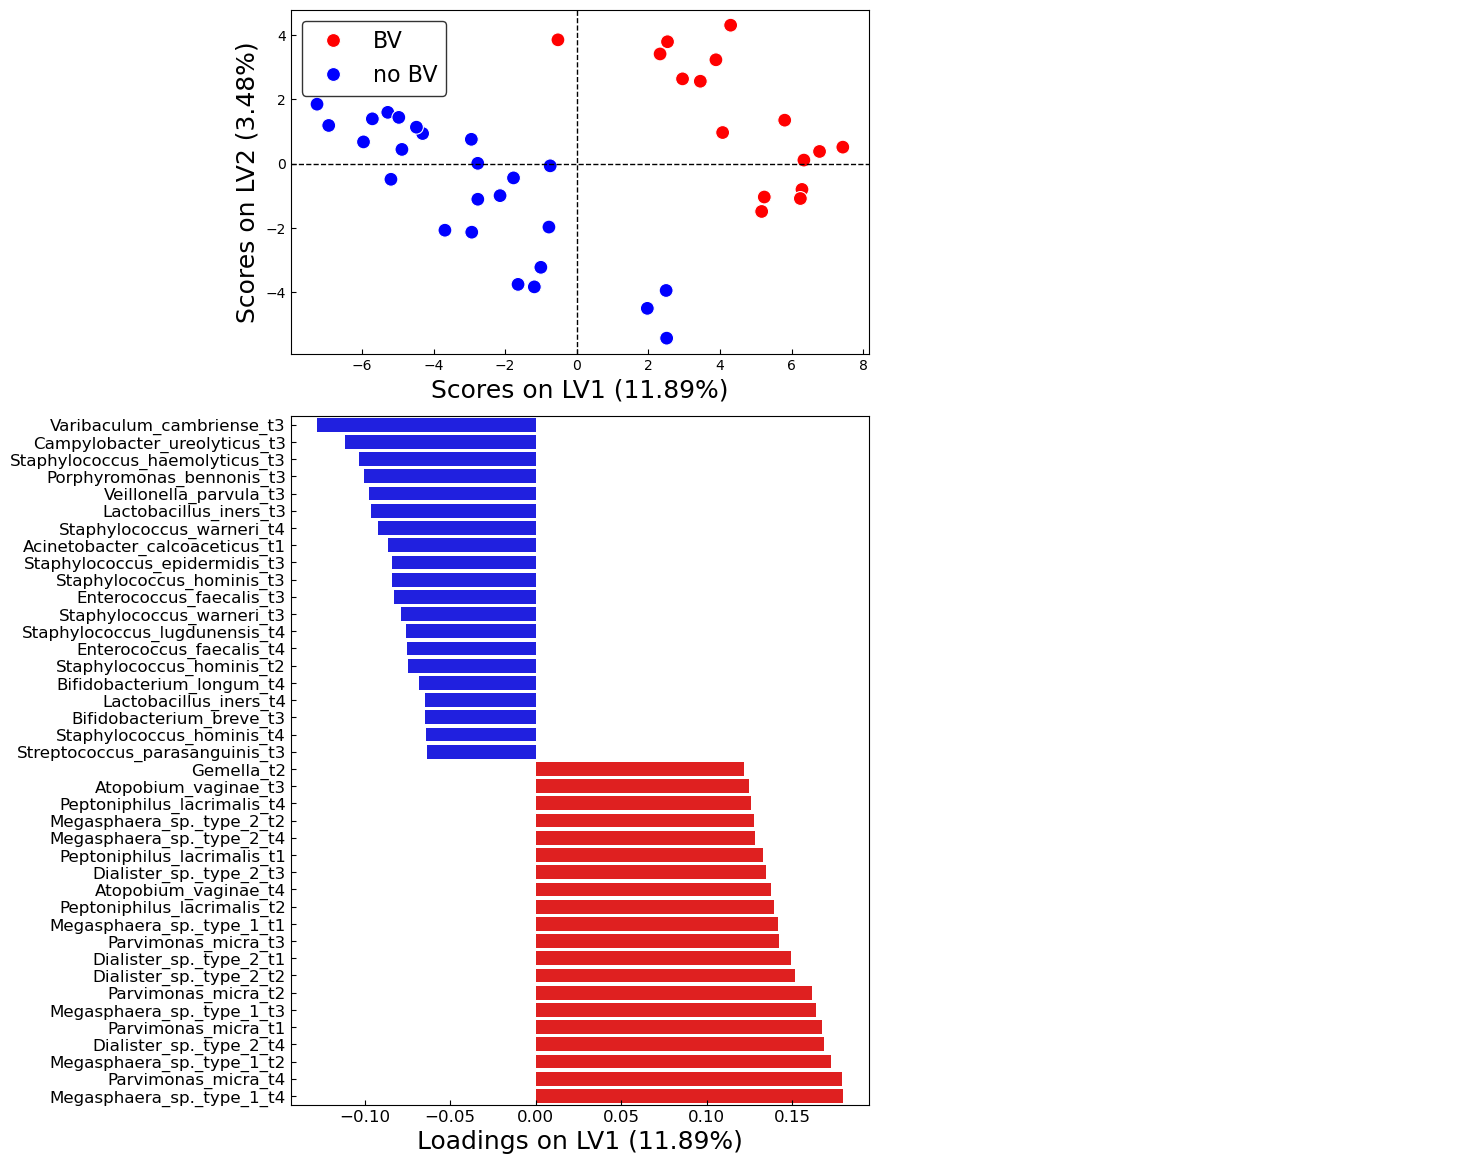

In [79]:
PLSDA_plots(df_3, y_3, num_components=2, orthogonalize=True, num_loadings=20, LV1=True, LV2=False)

In [36]:
elastic_net_selected_features.values

array(['Bacteroides_uniformis_t3', 'Parvimonas_micra_t4',
       'Streptococcus_anginosus_t2', 'Enterococcus_faecalis_t4',
       'Dialister_sp._type_2_t4', 'Veillonella_parvula_t1',
       'Bifidobacterium_longum_t4', 'Megasphaera_sp._type_1_t3',
       'Prevotella_disiens_t2', 'Varibaculum_cambriense_t3',
       'Bifidobacterium_breve_t3', 'Veillonella_montpellierensis_t1',
       'Veillonella_parvula_t3', 'Staphylococcus_haemolyticus_t3',
       'Megasphaera_sp._type_1_t2', 'Mobiluncus_curtisii_t1',
       'Actinomyces_neuii_t2', 'Parvimonas_micra_t1',
       'Prevotella_buccalis_t3', 'Veillonella_atypica_t4',
       'Megasphaera_sp._type_1_t4', 'Gemella_t2',
       'Bifidobacterium_longum_t2', 'Porphyromonas_bennonis_t1',
       'Streptococcus_oralis_t3', 'Prevotella_bivia_t2',
       'Enterococcus_faecalis_t2', 'Staphylococcus_haemolyticus_t2',
       'Streptococcus_oralis_t2', 'Enterococcus_faecalis_t3',
       'Lactobacillus_vaginalis_t4', 'Veillonella_parvula_t2',
       'Bacte

In [37]:
mrmr_selected_features

['Parvimonas_micra_t4',
 'Prevotella_disiens_t3',
 'Veillonella_montpellierensis_t1',
 'Bacteroides_uniformis_t3',
 'Enterococcus_faecalis_t4',
 'Megasphaera_sp._type_1_t4',
 'Dialister_sp._type_2_t4',
 'Streptococcus_anginosus_t2',
 'Veillonella_parvula_t3',
 'Megasphaera_sp._type_1_t2',
 'Parvimonas_micra_t1',
 'Megasphaera_sp._type_1_t3',
 'Lactobacillus_iners_t3',
 'Veillonella_parvula_t1',
 'Megasphaera_sp._type_1_t1',
 'Atopobium_vaginae_t4',
 'Varibaculum_cambriense_t3',
 'Parvimonas_micra_t3',
 'Dialister_sp._type_2_t1',
 'Bifidobacterium_longum_t4']

In [39]:
vip_features.values

array(['Megasphaera_sp._type_1_t1', 'Parvimonas_micra_t1',
       'Dialister_sp._type_2_t1', 'Veillonella_montpellierensis_t1',
       'Prevotella_buccalis_t1', 'Veillonella_parvula_t1',
       'Porphyromonas_bennonis_t1', 'Megasphaera_sp._type_1_t2',
       'Parvimonas_micra_t2', 'Dialister_sp._type_2_t2', 'Gemella_t2',
       'Peptoniphilus_lacrimalis_t2', 'Bifidobacterium_longum_t2',
       'Megasphaera_sp._type_1_t3', 'Parvimonas_micra_t3',
       'Enterococcus_faecalis_t3', 'Dialister_sp._type_2_t3',
       'Veillonella_parvula_t3', 'Bifidobacterium_breve_t3',
       'Porphyromonas_bennonis_t3', 'Varibaculum_cambriense_t3',
       'Atopobium_vaginae_t4', 'Megasphaera_sp._type_1_t4',
       'Parvimonas_micra_t4', 'Megasphaera_sp._type_2_t4',
       'Dialister_sp._type_2_t4', 'Peptoniphilus_lacrimalis_t4',
       'Staphylococcus_haemolyticus_t4', 'Mobiluncus_mulieris_t4'],
      dtype=object)

In [43]:
RF_feature_importances['Feature'][:30].values

array(['Parvimonas_micra_t4', 'Lactobacillus_iners_t3',
       'Megasphaera_sp._type_1_t2', 'Megasphaera_sp._type_1_t4',
       'Parvimonas_micra_t3', 'Atopobium_vaginae_t4',
       'Bacteroides_uniformis_t3', 'Parvimonas_micra_t1',
       'Lactobacillus_crispatus_t2', 'Corynebacterium_accolens_t3',
       'Varibaculum_cambriense_t3', 'Porphyromonas_sp._type_1_t1',
       'Gemella_t4', 'Gemella_t1', 'Gardnerella_vaginalis_t2',
       'Megasphaera_sp._type_1_t3', 'Dialister_sp._type_2_t2',
       'Aerococcus_christensenii_t4', 'Dialister_sp._type_2_t4',
       'Gardnerella_vaginalis_t4', 'Gemella_t2',
       'Streptococcus_agalactiae_t2', 'Dialister_sp._type_2_t3',
       'Sneathia_sanguinegens_t3', 'Aerococcus_christensenii_t2',
       'Aerococcus_christensenii_t1', 'Peptoniphilus_harei_t4',
       'Atopobium_vaginae_t2', 'Veillonella_montpellierensis_t1',
       'Atopobium_vaginae_t1'], dtype=object)

In [44]:
# Combine all the lists/arrays into a set to get unique values
common_features_set = set(elastic_net_selected_features) \
    .union(set(mrmr_selected_features)) \
    .union(set(vip_features)) \
    .union(set(RF_feature_importances['Feature'][:30].values))

common_features_set
# Convert the set back to a list
common_features = list(common_features_set)
common_features
# If you want to sort the list, you can uncomment the following line:
# common_features.sort()

# Print the list
#print(common_features)


['Bifidobacterium_longum_t2',
 'Parvimonas_micra_t4',
 'Prevotella_disiens_t2',
 'Streptococcus_agalactiae_t2',
 'Streptococcus_anginosus_t2',
 'Parvimonas_micra_t1',
 'Dialister_sp._type_2_t1',
 'Aerococcus_christensenii_t1',
 'Veillonella_parvula_t2',
 'Prevotella_buccalis_t1',
 'Atopobium_vaginae_t2',
 'Veillonella_parvula_t3',
 'Peptoniphilus_lacrimalis_t2',
 'Veillonella_atypica_t4',
 'Bifidobacterium_breve_t3',
 'Megasphaera_sp._type_1_t1',
 'Parvimonas_micra_t2',
 'Veillonella_montpellierensis_t1',
 'Bifidobacterium_longum_t4',
 'Sneathia_sanguinegens_t3',
 'Lactobacillus_crispatus_t2',
 'Enterococcus_faecalis_t4',
 'Gemella_t2',
 'Aerococcus_christensenii_t2',
 'Lactobacillus_iners_t3',
 'Streptococcus_oralis_t2',
 'Atopobium_vaginae_t1',
 'Lactobacillus_vaginalis_t4',
 'Dialister_sp._type_2_t2',
 'Actinomyces_neuii_t2',
 'Enterococcus_faecalis_t3',
 'Bacteroides_uniformis_t1',
 'Varibaculum_cambriense_t3',
 'Bacteroides_uniformis_t3',
 'Aerococcus_christensenii_t4',
 'Peptonip

In [46]:
existing_columns = [column for column in common_features if column in df_3.columns]

# Select only these columns from df_3
selected_columns_df = df_3[existing_columns]


Bifidobacterium_longum_t2  Parvimonas_micra_t4  Prevotella_disiens_t2  \
0                    0.000000           -23.025851               0.000000   
1                  -23.025851             3.526361             -23.025851   
2                  -23.025851             6.261492               2.197225   
3                  -23.025851             7.911691               1.791759   
4                    1.386294             1.791759               1.098612   
5                  -23.025851             7.437795               3.526361   
6                  -23.025851             7.967280               2.197225   
7                    1.791759             3.367296               3.828641   
8                  -23.025851             9.215925               4.110874   
9                    2.639057             0.693147               2.890372   
10                   0.000000           -23.025851             -23.025851   
11                 -23.025851             4.060443             -23.025851   
12                 -23.025851             4.454347             -23.025851   
13                   0.000000             2.302585               0.000000   
14                 -23.025851           -23.025851             -23.025851   
15                 -23.025851           -23.025851             -23.025851   
16                 -23.025851           -23.025851             -23.025851   
17                 -23.025851           -23.025851             -23.025851   
18                 -23.025851           -23.025851             -23.025851   
19                 -23.025851           -23.025851               0.693147   
20                 -23.025851             2.197225             -23.025851   
21                 -23.025851             1.609438               0.000000   
22                 -23.025851           -23.025851               2.397895   
23                 -23.025851           -23.025851               2.079442   
24                   2.564949             2.564949             -23.025851   
25                   1.098612             3.688879               2.302585   
26                 -23.025851           -23.025851             -23.025851   
27                 -23.025851             7.424762             -23.025851   
28                 -23.025851             8.061171             -23.025851   
29                   0.693147             2.833213             -23.025851   
30                 -23.025851             0.693147               5.828946   
31                 -23.025851           -23.025851             -23.025851   
32                 -23.025851             0.000000             -23.025851   
33                 -23.025851           -23.025851             -23.025851   
34                 -23.025851             7.940228             -23.025851   
35                 -23.025851             4.624973             -23.025851   
36                 -23.025851             0.000000             -23.025851   
37                 -23.025851           -23.025851             -23.025851   
38                 -23.025851             7.938089               1.945910   
39                 -23.025851             7.039660               1.791759   
40                 -23.025851             5.641907             -23.025851   

    Streptococcus_agalactiae_t2  Streptococcus_anginosus_t2  \
0                      4.624973                    4.394449   
1                    -23.025851                    0.000000   
2                    -23.025851                  -23.025851   
3                    -23.025851                    3.044522   
4                    -23.025851                    2.708050   
5                     11.390407                    8.777864   
6                     10.713729                    6.648985   
7                      2.639057                    3.258097   
8                      2.772589                    3.044522   
9                      6.840547                    1.609438   
10                     5.846439                  -23.025851   
11           

In [47]:
all_model_evaluation(selected_columns_df,y_3,test=True,n_splits=3)

accuracy  precision  recall    f1  specificity   mse  \
Random Forest            0.75       0.75    0.64  0.67         0.83  0.25   
Logistic Regression      0.75       0.68    0.77  0.70         0.76  0.25   
Linear SVM               0.78       0.71    0.77  0.72         0.80  0.22   
RBF SVM                  0.68       0.61    0.63  0.60         0.72  0.32   
K-Nearest Neighbors      0.78       0.74    0.82  0.75         0.76  0.22   
Gradient Boosting        0.56       0.57    0.32  0.34         0.72  0.44   
PLS-DA                   0.80       0.78    0.76  0.75         0.84  0.20   
Random Guess             0.61       0.00    0.00  0.00         1.00  0.39   

                      auc  
Random Forest        0.81  
Logistic Regression  0.74  
Linear SVM           0.74  
RBF SVM              0.74  
K-Nearest Neighbors  0.54  
Gradient Boosting    0.54  
PLS-DA               0.83  
Random Guess         0.70

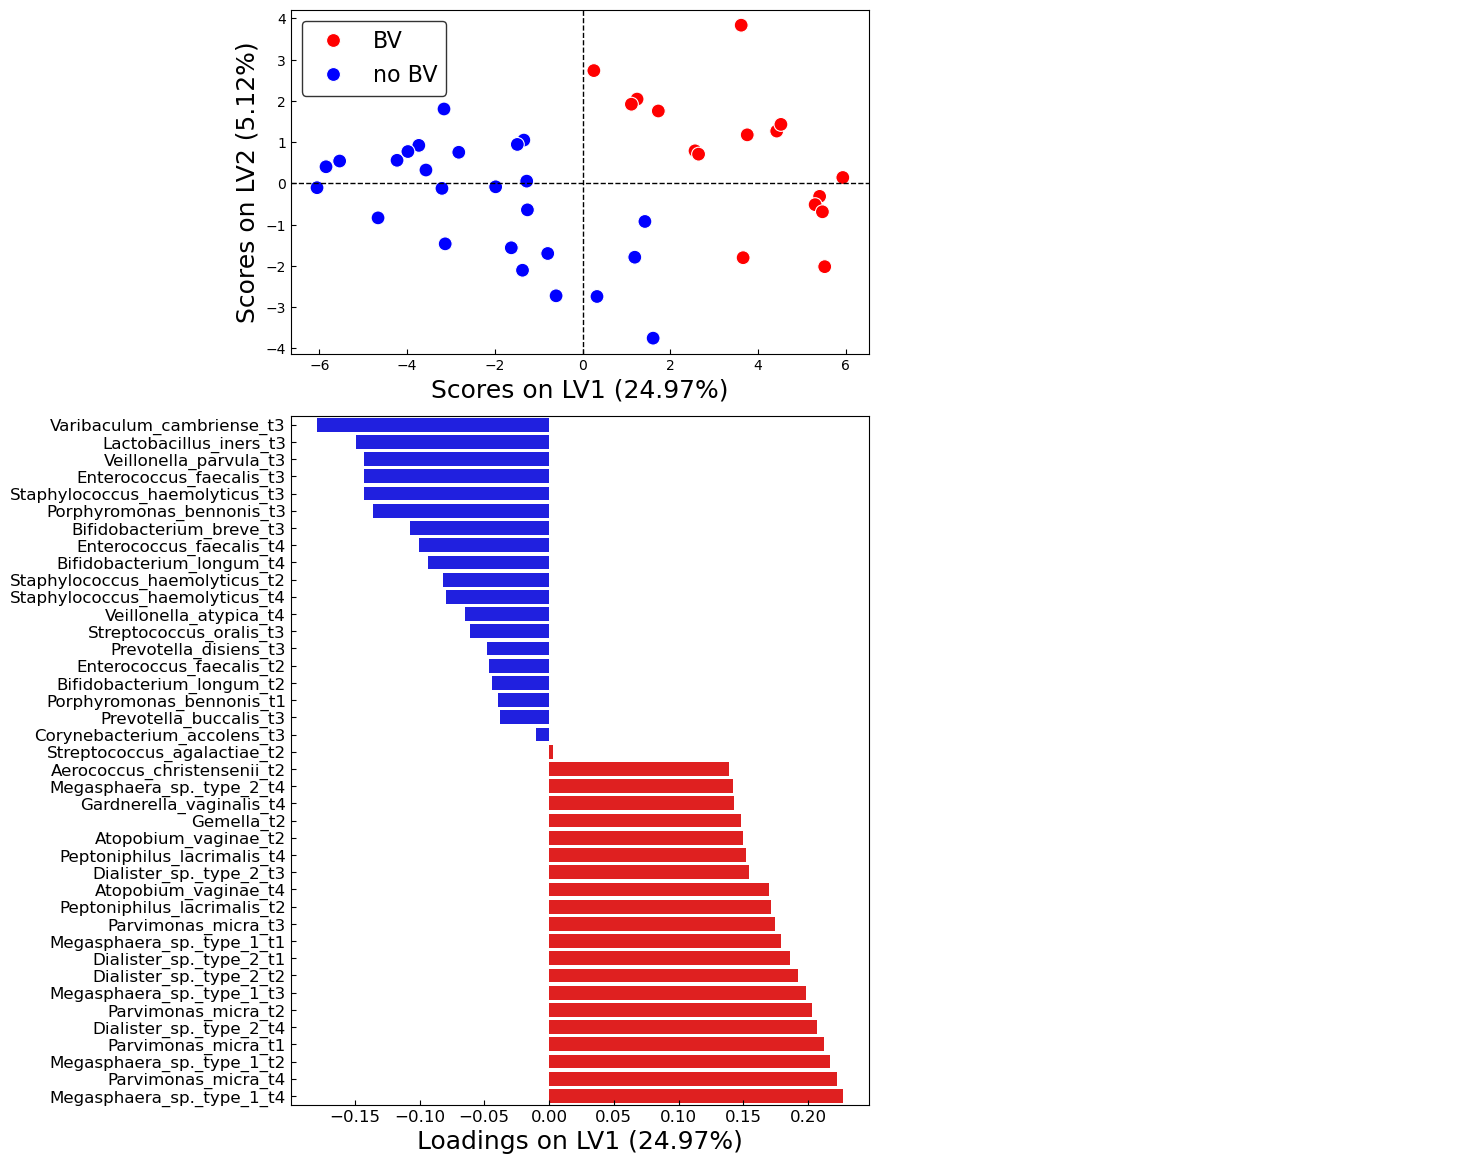

In [48]:
PLSDA_plots(selected_columns_df, y_3, num_components=2, orthogonalize=True, num_loadings=20, LV1=True, LV2=False)

# Perform feature selection on whole HMP using the features observed in Gajer

In [53]:
# HMP data
import warnings
# Suppress all warnings globally
warnings.filterwarnings("ignore")
from QE_functions import *
df_hmp = df_abundance_nugent(filename=None, log=False, rel_abund=True, zscore=False,cst=False, metabolomics=False)
# Gajer data
#df_gajer = Gajer_preprocessing_data(log=True, rel_abund=False, zscore=False)
#filtering: select all common hmp and gajer features 
#df_hmp_filtered = get_columns_w_names(df_hmp,lst)
#df_hmp_filtered_only_bacteria = df_hmp_filtered.iloc[:,3:-1] #filtered data with just bacterial species

relative abundance data


In [ ]:
X, y = menstruation_xblock_y_premensesX(df_hmp_filtered,menses_included=False,four_labels=False, multistability=False) #X=premenses data
print(np.unique(y, return_counts=True))
X, y = drop_blocks(X,y,thres=4)
#(X_1, y_1), (X_2, y_2), (X_3, y_3), (X_4, y_4), (X_5, y_5) = split_blocks_by_CST_most_frequent(X, y, equal_selection=False)
df_whole = flatten(X)

# Perform feature selection on whole hmp

# Elastic Net Feature Selection

In [8]:
#save for elastic net
matlab_ddm_save_data(df_whole,y)

In [9]:
from Elastic_Net_functions import *
xblock, yblock, xnames, patients = read_files('HMP_common_features_w_Gajer/Whole HMP')
num_runs = 1000 #total number of sample subsets and iterations
all_disease_data, all_cntrl_data = resample_creation(xblock, yblock, num_runs=num_runs, r=0.8)
all_B_min = elastic_network(all_disease_data, all_cntrl_data, num_runs=num_runs) 
a = pd.DataFrame(all_B_min)
a.to_csv('/Users/bonakdar/Desktop/all_B_min.csv')

run number: 0
run number: 1
run number: 2
run number: 3
run number: 4
run number: 5
run number: 6
run number: 7
run number: 8
run number: 9
run number: 10
run number: 11
run number: 12
run number: 13
run number: 14
run number: 15
run number: 16
run number: 17
run number: 18
run number: 19
run number: 20
run number: 21
run number: 22
run number: 23
run number: 24
run number: 25
run number: 26
run number: 27
run number: 28
run number: 29
run number: 30
run number: 31
run number: 32
run number: 33
run number: 34
run number: 35
run number: 36
run number: 37
run number: 38
run number: 39
run number: 40
run number: 41
run number: 42
run number: 43
run number: 44
run number: 45
run number: 46
run number: 47
run number: 48
run number: 49
run number: 50
run number: 51
run number: 52
run number: 53
run number: 54
run number: 55
run number: 56
run number: 57
run number: 58
run number: 59
run number: 60
run number: 61
run number: 62
run number: 63
run number: 64
run number: 65
run number: 66
run n

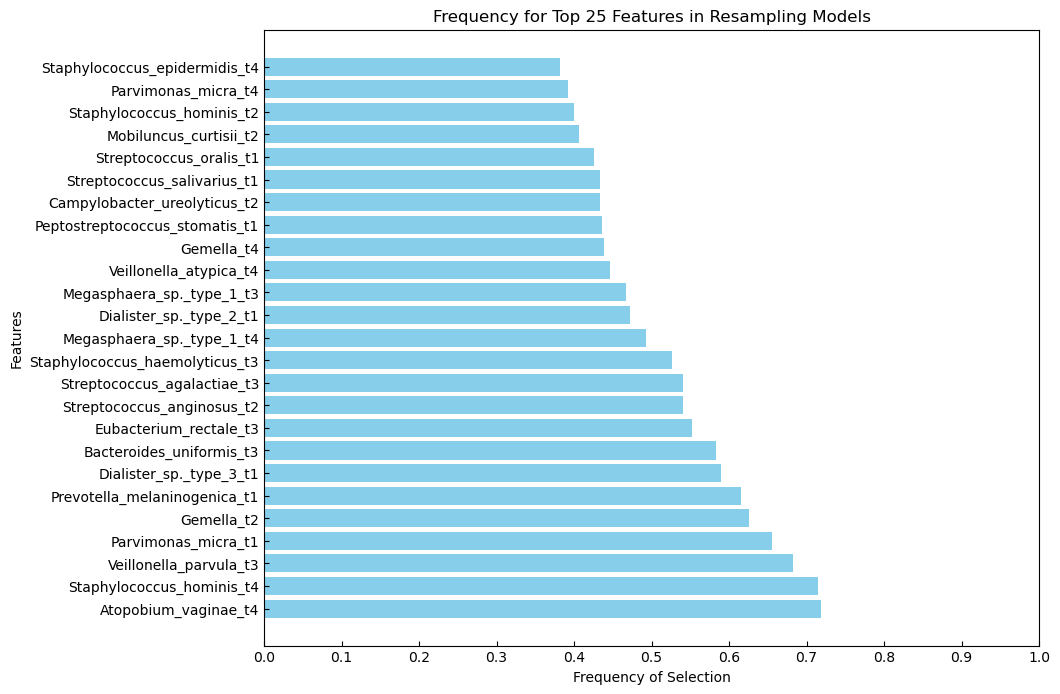

Best number of features =  29


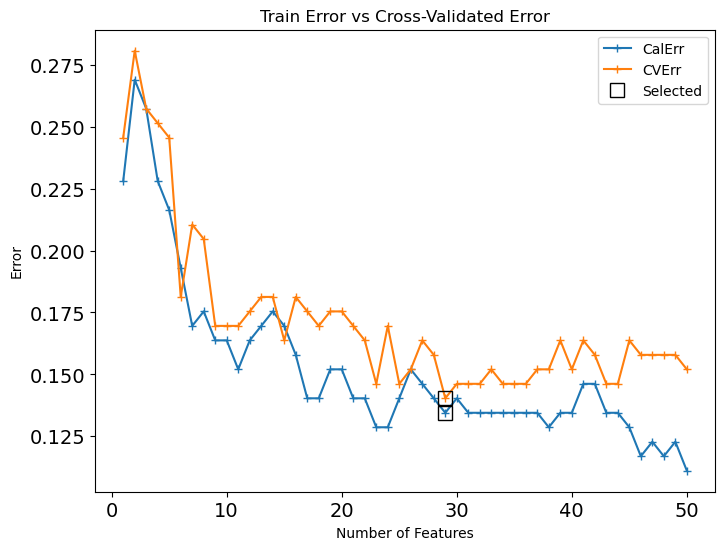

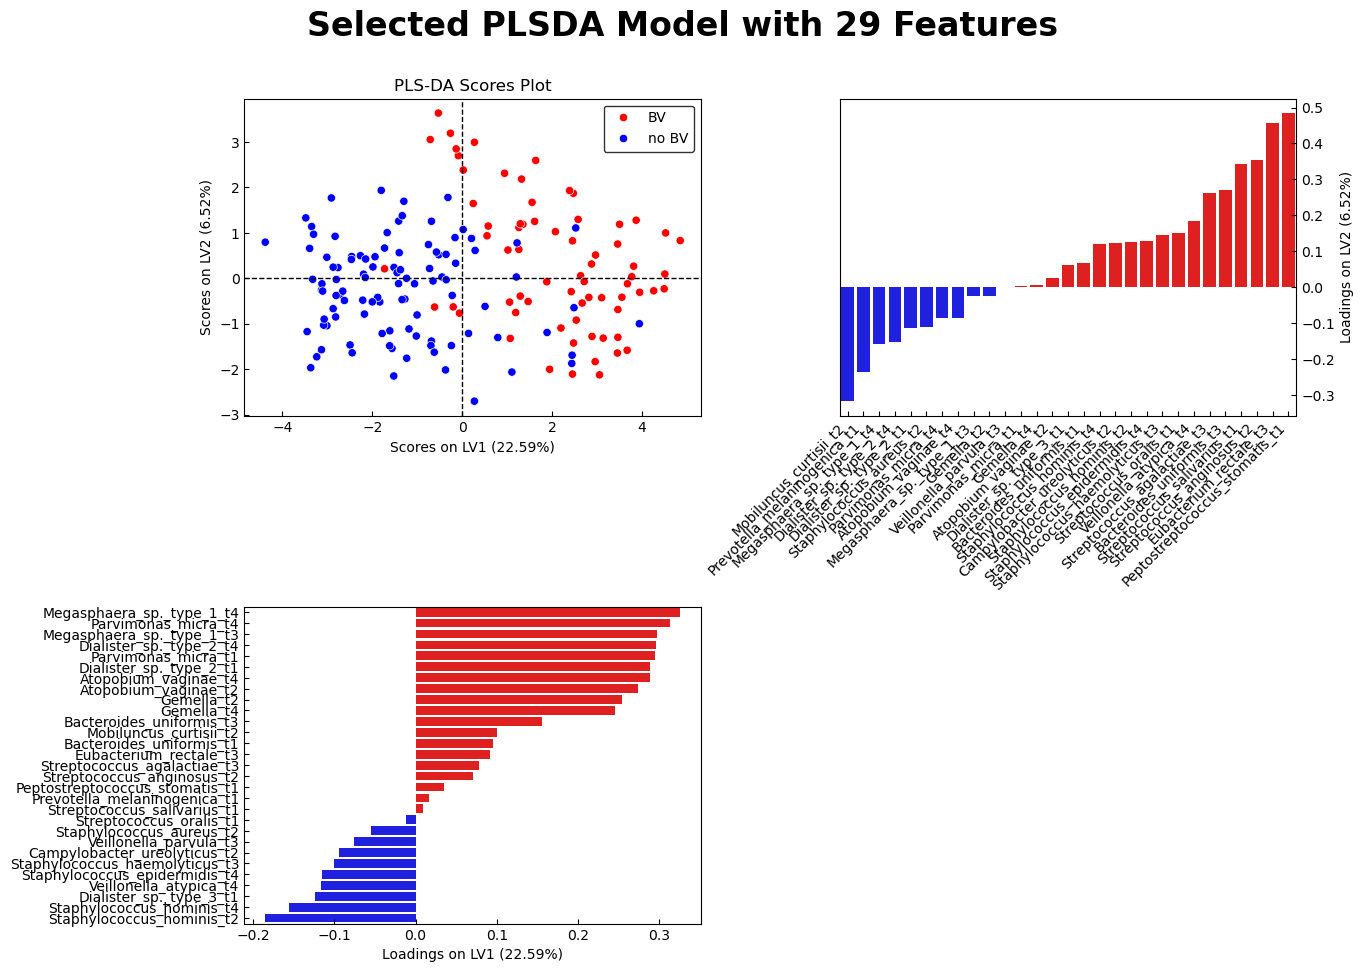

Calibration Error:  [0.13450292]
CV Error:  [0.14035088]
Random feature selections beat selected features 0.0% of the times
T-statistic: -3.9546896795912496
P-value: 8.772312792568475e-05


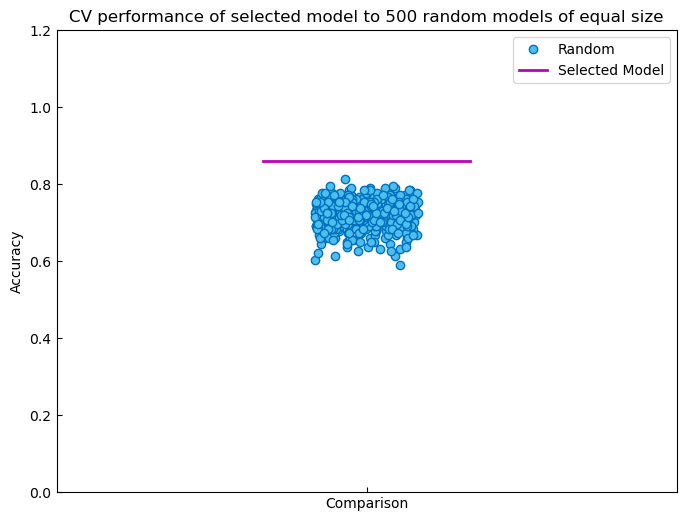

In [12]:
fr_sel_min = freq_of_selection(all_B_min,xnames)
plot_top_features(fr_sel_min,numb_of_features=25)
best_sel, tr_err_lst, te_err_lst = find_best_num_features(xblock, yblock, fr_sel_min, n_splits=5, fraction_of_features=0.2)
plot_CV_Cal_err(best_sel, tr_err_lst, te_err_lst)
PLSDA_plots(best_sel, fr_sel_min, xblock, yblock, tr_err_lst, te_err_lst, num_components=2, orthogonalize=True)
rand_CV_accuracy, CV_accuracy_sel = random_best_comparison(xblock, yblock, te_err_lst, best_sel, n_splits=5, num_rand_sets=500)
plot_cv_accuracy(rand_CV_accuracy, CV_accuracy_sel)

In [14]:
fr_sel_min
fr_sel_min.to_csv('/Users/bonakdar/Desktop/fr_sel_min.csv')

In [15]:
elastic_net_selected_features = fr_sel_min.index[:29]
elastic_net_selected_features

Index(['Atopobium_vaginae_t4', 'Staphylococcus_hominis_t4',
       'Veillonella_parvula_t3', 'Parvimonas_micra_t1', 'Gemella_t2',
       'Prevotella_melaninogenica_t1', 'Dialister_sp._type_3_t1',
       'Bacteroides_uniformis_t3', 'Eubacterium_rectale_t3',
       'Streptococcus_anginosus_t2', 'Streptococcus_agalactiae_t3',
       'Staphylococcus_haemolyticus_t3', 'Megasphaera_sp._type_1_t4',
       'Dialister_sp._type_2_t1', 'Megasphaera_sp._type_1_t3',
       'Veillonella_atypica_t4', 'Gemella_t4',
       'Peptostreptococcus_stomatis_t1', 'Campylobacter_ureolyticus_t2',
       'Streptococcus_salivarius_t1', 'Streptococcus_oralis_t1',
       'Mobiluncus_curtisii_t2', 'Staphylococcus_hominis_t2',
       'Parvimonas_micra_t4', 'Staphylococcus_epidermidis_t4',
       'Bacteroides_uniformis_t1', 'Dialister_sp._type_2_t4',
       'Atopobium_vaginae_t2', 'Staphylococcus_aureus_t2'],
      dtype='object')

In [23]:
fr_sel_min[40:60]

Frequency
Lactobacillus_gasseri_t4            0.331
Actinomyces_neuii_t2                0.329
Megasphaera_sp._type_2_t2           0.326
Bifidobacterium_breve_t1            0.319
Actinomyces_neuii_t3                0.309
Prevotella_buccalis_t3              0.296
Veillonella_atypica_t3              0.296
Veillonella_parvula_t2              0.288
Enterococcus_faecalis_t2            0.285
Prevotella_bivia_t4                 0.281
Veillonella_atypica_t1              0.279
Anaerococcus_vaginalis_t2           0.277
Prevotella_melaninogenica_t2        0.276
Atopobium_vaginae_t3                0.274
Atopobium_vaginae_t1                0.270
Aerococcus_christensenii_t2         0.266
Acinetobacter_calcoaceticus_t3      0.264
Bifidobacterium_breve_t2            0.264
Lactobacillus_jensenii_t2           0.260
Streptococcus_oralis_t3             0.259

# mRMR Feature Selection

In [26]:
# select top 10 features using mRMR
from mrmr import mrmr_classif
mrmr_selected_features = mrmr_classif(X=df_whole, y=y, K=80)
mrmr_selected_features

100%|█████████████████████████████████████████████| 80/80 [00:01<00:00, 62.09it/s]


['Megasphaera_sp._type_1_t4',
 'Staphylococcus_aureus_t4',
 'Gardnerella_vaginalis_t3',
 'Parvimonas_micra_t1',
 'Staphylococcus_hominis_t2',
 'Atopobium_vaginae_t3',
 'Gemella_t2',
 'Dialister_sp._type_2_t1',
 'Lactobacillus_crispatus_t1',
 'Megasphaera_sp._type_1_t3',
 'Atopobium_vaginae_t4',
 'Atopobium_vaginae_t1',
 'Parvimonas_micra_t4',
 'Gardnerella_vaginalis_t1',
 'Megasphaera_sp._type_1_t2',
 'Atopobium_vaginae_t2',
 'Staphylococcus_hominis_t4',
 'Dialister_sp._type_2_t4',
 'Gemella_t4',
 'Lactobacillus_crispatus_t2',
 'Parvimonas_micra_t2',
 'Megasphaera_sp._type_1_t1',
 'Gardnerella_vaginalis_t2',
 'Gardnerella_vaginalis_t4',
 'Eubacterium_rectale_t3',
 'Gemella_t1',
 'Dialister_sp._type_2_t3',
 'Bacteroides_uniformis_t3',
 'Gemella_t3',
 'Lactobacillus_crispatus_t4',
 'Mobiluncus_mulieris_t2',
 'Dialister_sp._type_2_t2',
 'Aerococcus_christensenii_t2',
 'Parvimonas_micra_t3',
 'Lactobacillus_jensenii_t2',
 'Mobiluncus_mulieris_t4',
 'Staphylococcus_hominis_t3',
 'Peptoniphi

# VIP Feature Selection

In [18]:
import warnings
# Suppress all warnings globally
warnings.filterwarnings("ignore")
from QE_functions import *
model = plsda_model(df_whole,y)
vip_features, vip_df = function_vip(df_whole,y,model,thres=None)

vip_filtered_sorted = vip_df[vip_df['VIP'] > 1].sort_values(by='VIP', ascending=False)
vip_filtered_sorted

Cross-validated accuracies: [0.7714285714285715, 0.8235294117647058, 0.8529411764705882, 0.8235294117647058, 0.7058823529411765]
Mean cross-validated accuracy: 0.80


VIP
Megasphaera_sp._type_1_t4    2.039511
Megasphaera_sp._type_1_t3    1.972839
Megasphaera_sp._type_1_t1    1.900046
Atopobium_vaginae_t1         1.890208
Atopobium_vaginae_t4         1.820789
...                               ...
Mobiluncus_mulieris_t3       1.007000
Corynebacterium_accolens_t1  1.006697
Veillonella_atypica_t1       1.002183
Porphyromonas_sp._type_1_t3  1.000552
Alloscardovia_omnicolens_t4  1.000207

[97 rows x 1 columns]

In [28]:
vip_filtered_sorted[50:100]

VIP
Prevotella_buccalis_t1             1.162572
Lactobacillus_jensenii_t4          1.147124
Peptoniphilus_harei_t1             1.146290
Aerococcus_christensenii_t3        1.136825
Mobiluncus_mulieris_t2             1.133490
Prevotella_buccalis_t4             1.127264
Staphylococcus_epidermidis_t4      1.123914
Staphylococcus_epidermidis_t3      1.122175
Porphyromonas_uenonis_t4           1.115081
Peptoniphilus_lacrimalis_t2        1.112604
Varibaculum_cambriense_t1          1.107731
Prevotella_buccalis_t3             1.104148
Anaerococcus_tetradius_t3          1.103753
Lactobacillus_jensenii_t2          1.101117
Anaerococcus_vaginalis_t1          1.098698
Lactobacillus_vaginalis_t2         1.094990
Finegoldia_magna_t4                1.091760
Peptoniphilus_lacrimalis_t3        1.090847
Peptoniphilus_asaccharolyticus_t3  1.083212
Peptoniphilus_asaccharolyticus_t4  1.079583
Corynebacterium_accolens_t3        1.078754
Prevotella_bivia_t4                1.077381
Enterococcus_faecalis_t3           1.071816
Mobiluncus_curtisii_t2             1.061410
Acinetobacter_calcoaceticus_t4     1.061130
Actinomyces_urogenitalis_t2        1.058848
Dialister_propionicifaciens_t1     1.057820
Atopobium_minutum_t2               1.053005
Megasphaera_sp._type_2_t3          1.050276
Anaerococcus_tetradius_t2          1.041657
Peptoniphilus_harei_t3             1.041029
Sneathia_sanguinegens_t2           1.040577
Streptococcus_anginosus_t2         1.038201
Porphyromonas_uenonis_t2           1.032958
Sneathia_sanguinegens_t4           1.031640
Peptoniphilus_harei_t4             1.030154
Porphyromonas_uenonis_t1           1.026294
Acinetobacter_calcoaceticus_t2     1.025815
Finegoldia_magna_t1                1.018855
Finegoldia_magna_t3                1.016295
Prevotella_buccalis_t2             1.013519
Porphyromonas_sp._type_1_t1        1.010937
Mobiluncus_mulieris_t3             1.007000
Corynebacterium_accolens_t1        1.006697
Veillonella_atypica_t1             1.002183
Porphyromonas_sp._type_1_t3        1.000552
Alloscardovia_omnicolens_t4        1.000207

# Random Forest Feature Ranking

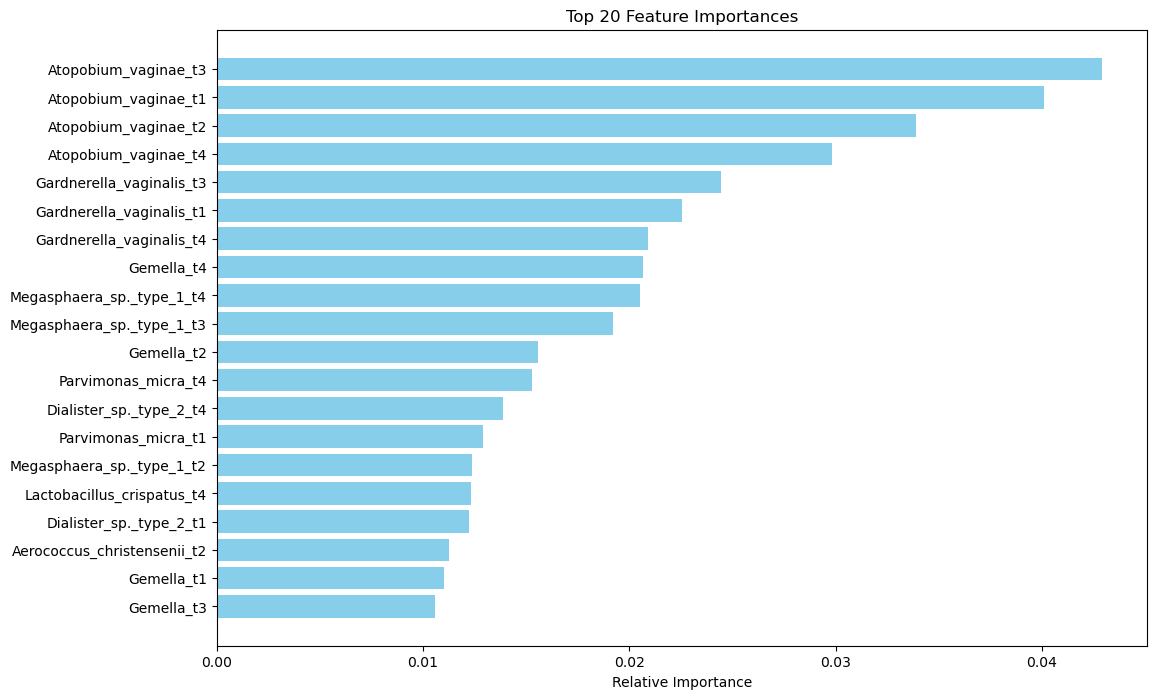

Feature  Importance
84        Sneathia_sanguinegens_t2    0.004952
221      Staphylococcus_hominis_t4    0.004931
207    Peptoniphilus_lacrimalis_t4    0.004785
237      Varibaculum_cambriense_t4    0.004695
118    Alloscardovia_omnicolens_t2    0.004663
144    Peptoniphilus_lacrimalis_t3    0.004618
8      Streptococcus_agalactiae_t1    0.004603
80       Anaerococcus_tetradius_t2    0.004584
0           Lactobacillus_iners_t1    0.004581
36         Streptococcus_oralis_t1    0.004576
29     Corynebacterium_accolens_t1    0.004479
21        Sneathia_sanguinegens_t1    0.004475
65      Lactobacillus_crispatus_t2    0.004353
245    Actinomyces_urogenitalis_t4    0.004181
115           Atopobium_minutum_t2    0.004179
82             Prevotella_bivia_t2    0.004170
141        Dialister_sp._type_2_t3    0.004076
206      Anaerococcus_tetradius_t4    0.004073
182    Actinomyces_urogenitalis_t3    0.004067
223         Peptoniphilus_harei_t4    0.003973
19             Prevotella_bivia_t1    0.003964
162        Streptococcus_oralis_t3    0.003939
74      Streptococcus_anginosus_t2    0.003932
134    Streptococcus_agalactiae_t3    0.003893
34          Peptoniphilus_harei_t1    0.003861
70        Lactobacillus_gasseri_t2    0.003757
114         Mobiluncus_mulieris_t2    0.003611
126         Lactobacillus_iners_t3    0.003569
73       Megasphaera_sp._type_2_t2    0.003540
151     Lactobacillus_vaginalis_t3    0.003441
145            Prevotella_bivia_t3    0.003433
33       Anaerococcus_vaginalis_t1    0.003420
22        Staphylococcus_aureus_t1    0.003385
99         Streptococcus_oralis_t2    0.003379
229           Actinomyces_neuii_t4    0.003366
55     Alloscardovia_omnicolens_t1    0.003343
160         Peptoniphilus_harei_t3    0.003331
213         Mobiluncus_curtisii_t4    0.003330
128     Lactobacillus_crispatus_t3    0.003315
4        Lactobacillus_jensenii_t1    0.003314
175     Fusobacterium_nucleatum_t3    0.003271
95       Staphylococcus_hominis_t2    0.003225
203  Staphylococcus_lugdunensis_t4    0.003171
208            Prevotella_bivia_t4    0.003132
56     Actinomyces_urogenitalis_t1    0.003116
108         Veillonella_atypica_t2    0.003069
6      Aerococcus_christensenii_t1    0.003056
143      Anaerococcus_tetradius_t3    0.003036
53   Staphylococcus_epidermidis_t1    0.003029
197    Streptococcus_agalactiae_t4    0.003028

In [30]:
RF_feature_importances = RForest_top_features_plot(df_whole,y,numb_features=20)
RF_feature_importances[50:100]

# Create the df_whole dataframe with selected features from 4 feature selection models (combined all)

Will select the most selected strains in a family. e.g. Dialister type 2 selected 4 times, type 3 selected 2 times. thus type 2 will be selected into df_whole

In [37]:
#list of all features selected in either of methods
#list of all features common between HMP and Gajer
lst_either  = ['SERIAL','PID','MENSTRUATION','NUGENT_CLASS',
                                   'Lactobacillus_iners','Lactobacillus_crispatus',
                                   'Lactobacillus_jensenii','Lactobacillus_gasseri',
                                  'Lactobacillus_vaginalis','Parvimonas_micra',
                                  'Enterococcus_faecalis','Finegoldia_magna',
                                  'Gemella','Sneathia_sanguinegens',
                                  'Atopobium_vaginae','Corynebacterium_accolens',
                                  'Prevotella_buccalis',
                                  'Gardnerella_vaginalis','Megasphaera_sp._type_1',
                                  'Staphylococcus_hominis',
                                  'Aerococcus_christensenii',
                                  'Streptococcus_anginosus',
                                  'Dialister_sp._type_2','Anaerococcus_tetradius',
                                  'Peptoniphilus_lacrimalis',
                                  'Veillonella_parvula','Bifidobacterium_breve',
                                  'Actinomyces_neuii',
                                  'Eubacterium_rectale','Clostridium_colicanis',
                                  'Campylobacter_ureolyticus',
                                  'Varibaculum_cambriense',
                                  'Mobiluncus_mulieris',
                                  'Porphyromonas_uenonis',
                                  'Peptostreptococcus_stomatis',
                                  'Acinetobacter_calcoaceticus',
                                  'Bacteroides_uniformis']

In [52]:
#df_hmp_selected_filtered = get_columns_w_names(df_hmp,lst_either)
df_gajer = Gajer_preprocessing_data(log=False, rel_abund=True, zscore=True)


relative abundance + zscore data


In [40]:
dict_rename = {'SERIAL': 'SERIAL', 'PID': 'PID', 'MENSTRUATION': 'MENSTRUATION', 'NUGENT_CLASS': 'NUGENT_CLASS', 
                       'L. iners': 'Lactobacillus_iners', 'L. crispatus': 'Lactobacillus_crispatus', 'L. jensenii': 'Lactobacillus_jensenii', 
                       'L. gasseri': 'Lactobacillus_gasseri', 'L.vaginalis': 'Lactobacillus_vaginalis','Parvimonas': 'Parvimonas_micra', 
                       'Enterococcus': 'Enterococcus_faecalis', 'Finegoldia': 'Finegoldia_magna', 'Gemella': 'Gemella', 
                       'Sneathia': 'Sneathia_sanguinegens', 'Atopobium': 'Atopobium_vaginae', 'Corynebacterium': 'Corynebacterium_accolens',
                       'Prevotella': 'Prevotella_buccalis', 'Gardnerella': 'Gardnerella_vaginalis', 'Megasphaera': 'Megasphaera_sp._type_1', 
                       'Staphylococcus': 'Staphylococcus_hominis', 'Aerococcus':'Aerococcus_christensenii',
              'Streptococcus':'Streptococcus_anginosus','Dialister':'Dialister_sp._type_2',
              'Anaerococcus':'Anaerococcus_tetradius','Peptoniphilus':'Peptoniphilus_lacrimalis',
              'Veillonella':'Veillonella_parvula','Bifidobacterium':'Bifidobacterium_breve',
              'Actinomyces':'Actinomyces_neuii','Eubacterium':'Eubacterium_rectale',
              'Clostridium':'Clostridium_colicanis','Campylobacter':'Campylobacter_ureolyticus',
              'Varibaculum':'Varibaculum_cambriense','Mobiluncus':'Mobiluncus_mulieris',
              'Porphyromonas':'Porphyromonas_uenonis','Peptostreptococcus':'Peptostreptococcus_stomatis',
              'Acinetobacter':'Acinetobacter_calcoaceticus','Bacteroides':'Bacteroides_uniformis'}

#filtering: select common hmp and gajer features 
df_hmp_filtered_final, df_gajer_filtered_final = common_feature_selection_in_2_dataframes(df_hmp,df_gajer,rename_dict=dict_rename)


Number of x_blocks (X): 239
Shape of labels (y): (239,)
(array([0, 1]), array([141,  98]))
Filtered number of x_blocks: 171
Filtered shape of labels (y): (171,)
Number of 1s: 69
Number of 0s: 102
Cross-validation scores: [0.85714286 0.82352941 0.85294118 0.79411765 0.73529412]
Mean cross-validation accuracy: 0.81


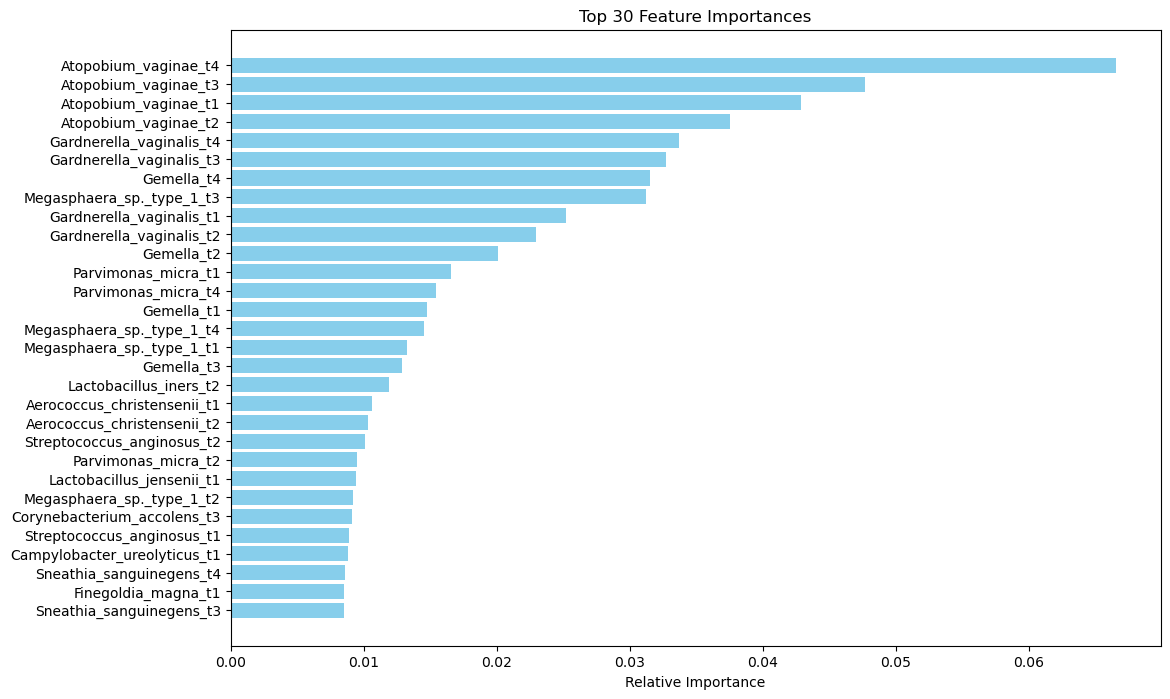

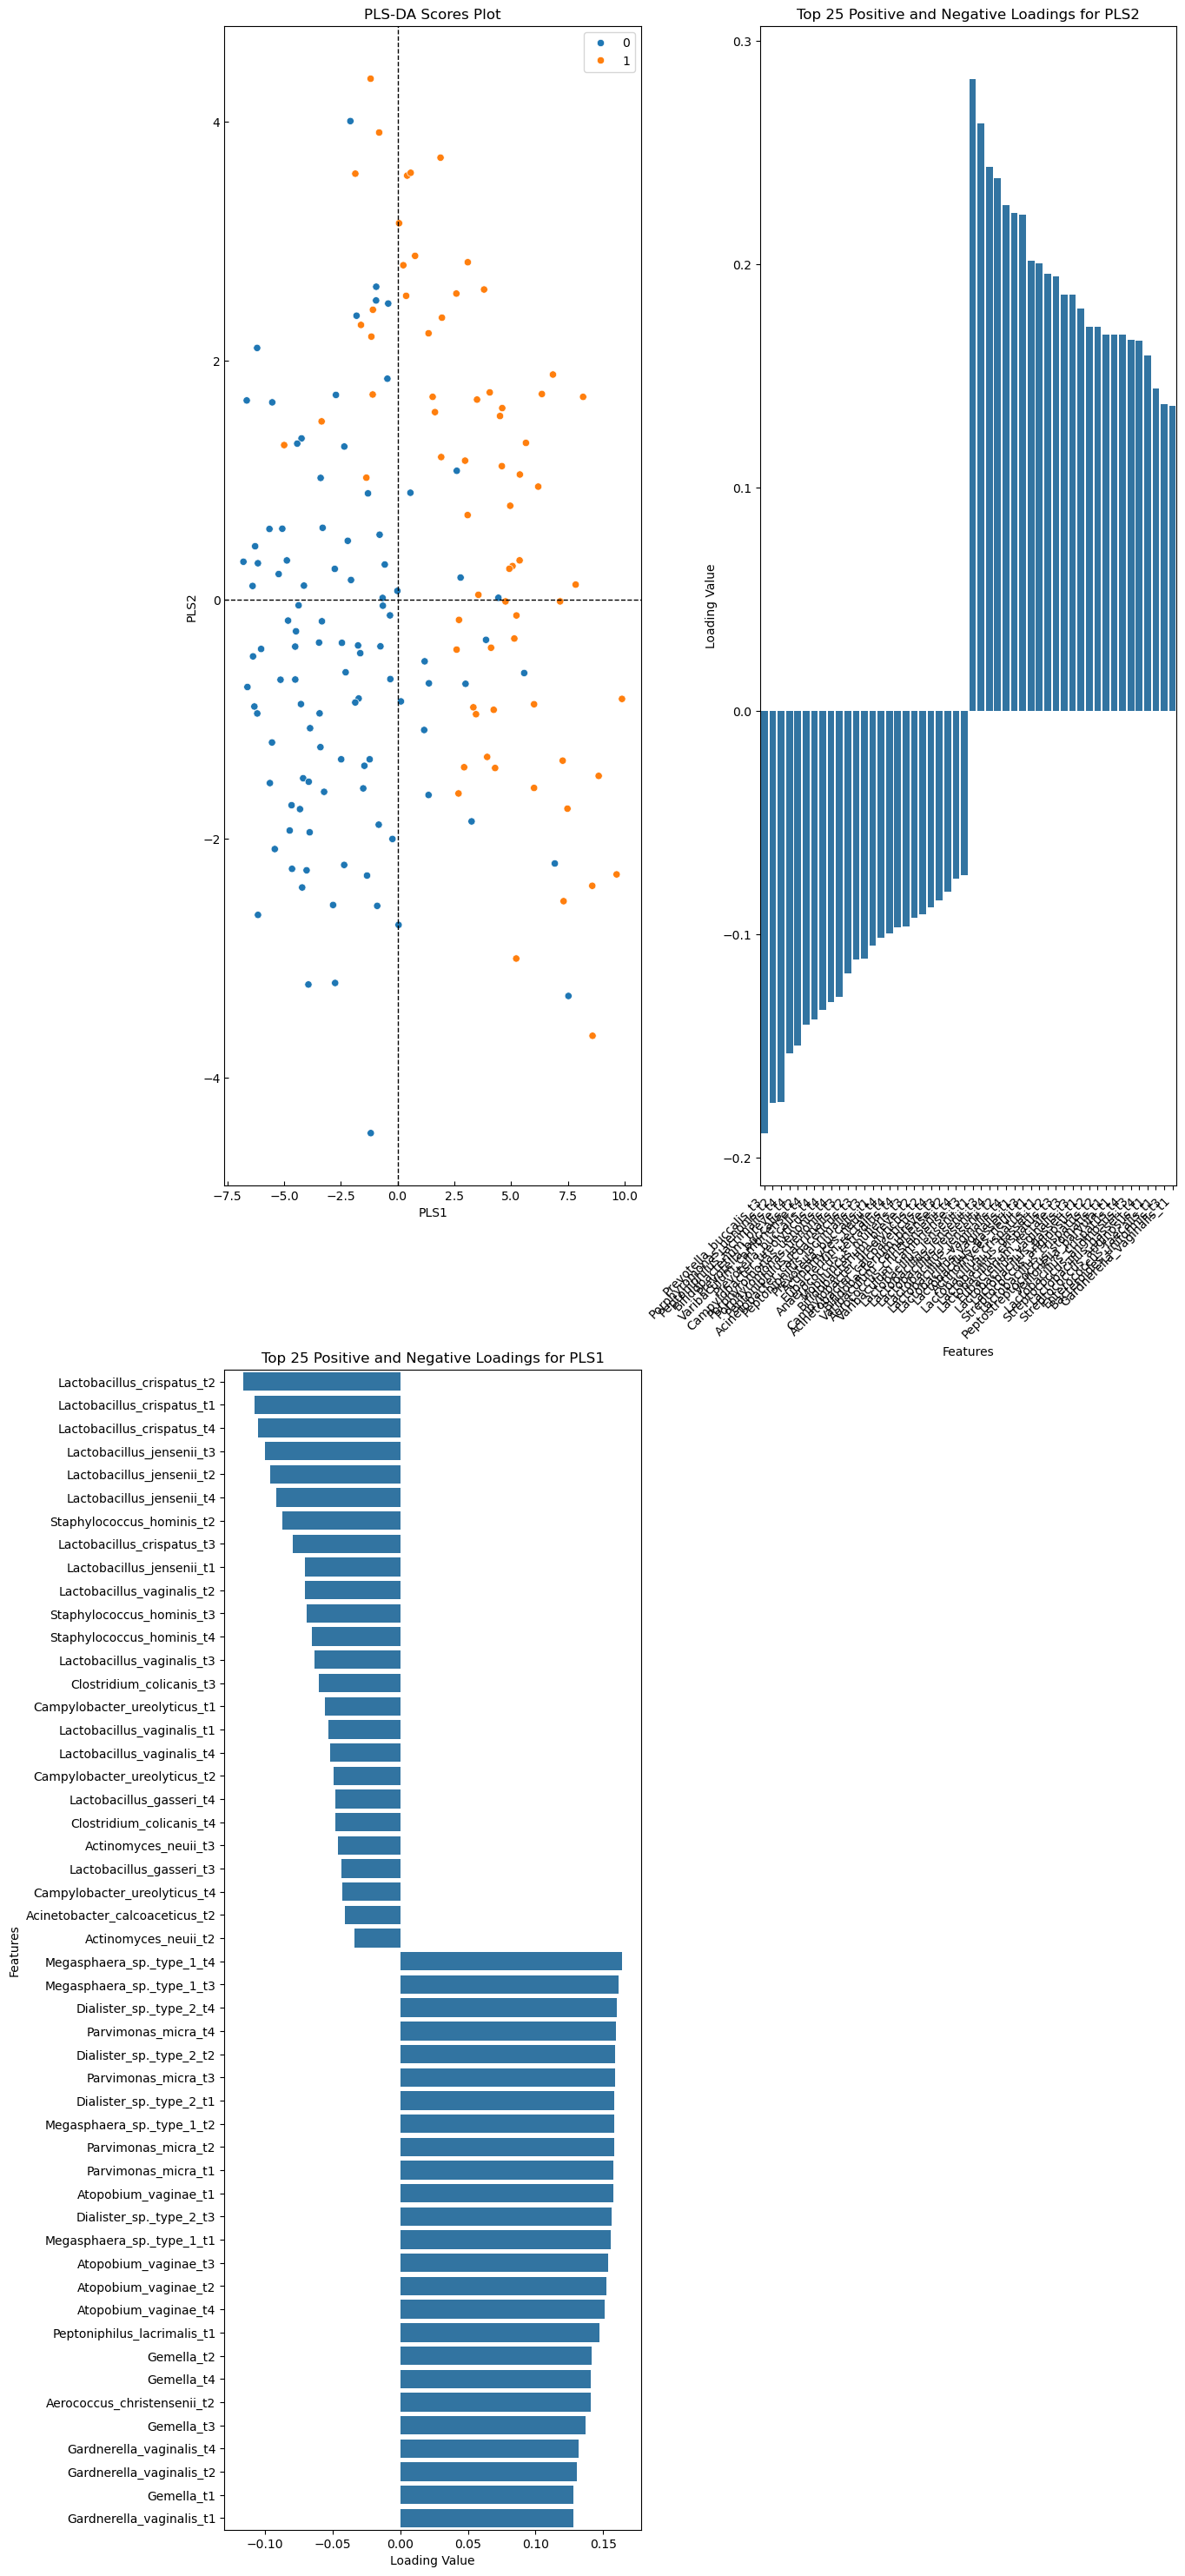

accuracy  precision  recall    f1  specificity   mse  \
Random Forest            0.83       0.82    0.75  0.78         0.88  0.17   
Logistic Regression      0.72       0.66    0.64  0.65         0.77  0.28   
Linear SVM               0.70       0.62    0.64  0.63         0.74  0.30   
RBF SVM                  0.81       0.75    0.78  0.76         0.82  0.19   
K-Nearest Neighbors      0.74       0.67    0.71  0.69         0.76  0.26   
Gradient Boosting        0.77       0.72    0.70  0.71         0.81  0.23   
PLS-DA                   0.82       0.79    0.75  0.77         0.86  0.18   
Random Guess             0.60       0.00    0.00  0.00         1.00  0.40   

                      auc  
Random Forest        0.73  
Logistic Regression  0.66  
Linear SVM           0.65  
RBF SVM              0.78  
K-Nearest Neighbors  0.73  
Gradient Boosting    0.68  
PLS-DA               0.81  
Random Guess         0.70

In [44]:
X_train, y_train = menstruation_xblock_y_premensesX(df_hmp_filtered_final, menses_included=False,four_labels=False, multistability=False) #X=premenses data
print(np.unique(y_train, return_counts=True))
X_train, y_train = drop_blocks(X_train,y_train,thres=4)
#(X_1, y_1), (X_2, y_2), (X_3, y_3), (X_4, y_4), (X_5, y_5) = split_blocks_by_CST_most_frequent(X, y, equal_selection=False)
df_train = flatten(X_train)
random_forest_model(df_train,y_train)
RForest_top_features_plot(df_train,y_train,numb_features=30)
plsda_scores_loading(df_train,y_train,numb_loadings=25, orthogonalize=True)
all_model_evaluation(df_train,y_train,test=True,n_splits=3)

Number of x_blocks (X): 116
Shape of labels (y): (116,)
(array([0, 1]), array([70, 46]))
Filtered number of x_blocks: 76
Filtered shape of labels (y): (76,)
Number of 1s: 30
Number of 0s: 46
Cross-validation scores: [0.9375     0.86666667 0.8        0.73333333 0.93333333]
Mean cross-validation accuracy: 0.85


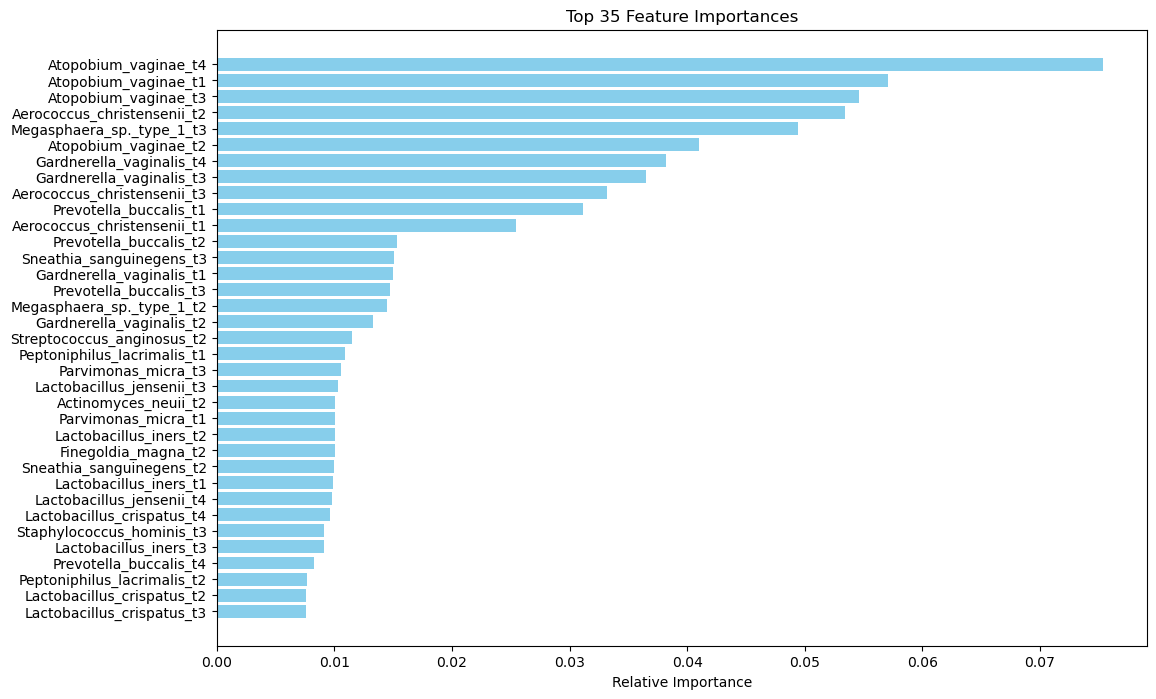

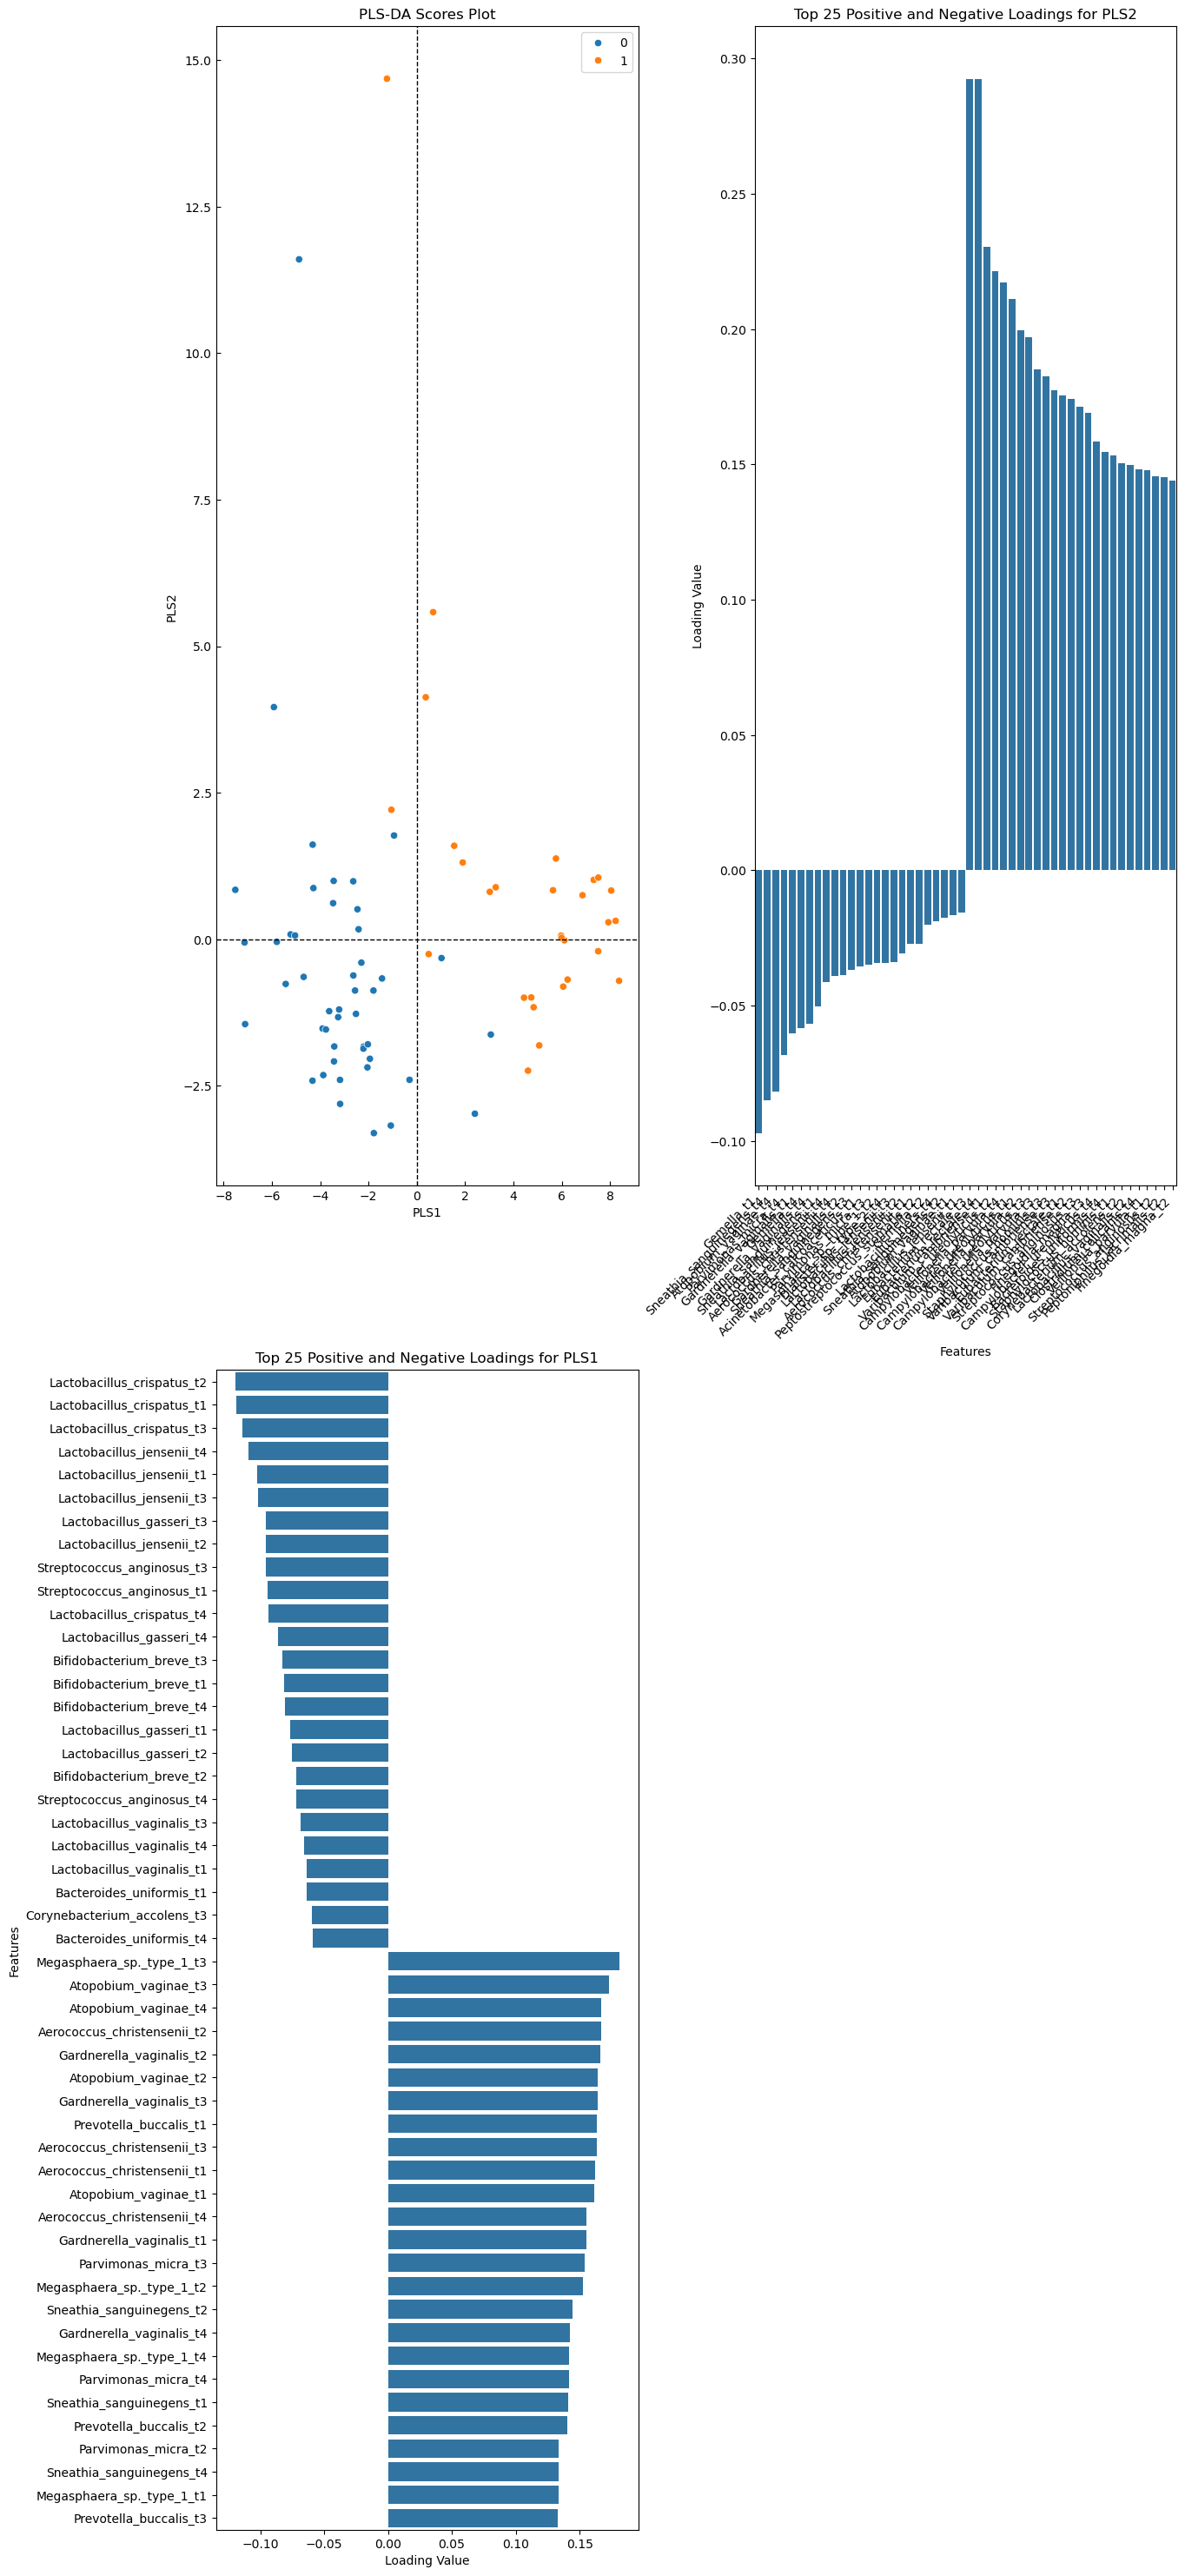

accuracy  precision  recall    f1  specificity   mse  \
Random Forest            0.85       0.83    0.80  0.81         0.89  0.15   
Logistic Regression      0.80       0.80    0.73  0.74         0.84  0.20   
Linear SVM               0.78       0.79    0.67  0.70         0.84  0.22   
RBF SVM                  0.85       0.83    0.80  0.81         0.89  0.15   
K-Nearest Neighbors      0.84       0.80    0.80  0.80         0.87  0.16   
Gradient Boosting        0.83       0.83    0.77  0.77         0.87  0.17   
PLS-DA                   0.85       0.87    0.77  0.81         0.91  0.15   
Random Guess             0.61       0.00    0.00  0.00         1.00  0.39   

                      auc  
Random Forest        0.93  
Logistic Regression  0.88  
Linear SVM           0.85  
RBF SVM              0.91  
K-Nearest Neighbors  0.88  
Gradient Boosting    0.90  
PLS-DA               0.90  
Random Guess         0.70

In [45]:
# Gajer Cohort
X_test, y_test = menstruation_xblock_y_premensesX(df_gajer_filtered_final,menses_included=False,four_labels=False, multistability=False) #X=premenses data
print(np.unique(y_test, return_counts=True))
X_test, y_test = drop_blocks(X_test,y_test,thres=4)


df_test = flatten(X_test)
random_forest_model(df_test,y_test)
RForest_top_features_plot(df_test,y_test,numb_features=35)
plsda_scores_loading(df_test,y_test,numb_loadings=25, orthogonalize=True)
all_model_evaluation(df_test,y_test,test=True,n_splits=3)

In [46]:
lstm_model_train_test(X_train, y_train, X_test, y_test, padding_value=-1000)

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 169ms/step - accuracy: 0.5838 - loss: 1.0138 - val_accuracy: 0.6447 - val_loss: 0.5860
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 140ms/step - accuracy: 0.7133 - loss: 0.7212 - val_accuracy: 0.6316 - val_loss: 0.6168
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 145ms/step - accuracy: 0.7530 - loss: 0.6021 - val_accuracy: 0.7105 - val_loss: 0.5358
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 143ms/step - accuracy: 0.8124 - loss: 0.4055 - val_accuracy: 0.7763 - val_loss: 0.5005
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 161ms/step - accuracy: 0.8586 - loss: 0.3561 - val_accuracy: 0.6316 - val_loss: 0.6703
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 165ms/step - accuracy: 0.8983 - loss: 0.2607 - val_accuracy: 0.6579 - val_loss: 0.6302
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 193ms/step - accuracy: 0.8535 - loss: 0.4172 - val_accuracy: 0.6842 - val_loss: 0.6968
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 191ms/step - accuracy: 0.9422 - loss: 0.1676 - val_accuracy: 0.7237 - val_loss:

(0.7763157894736842, 0.6046511627906976, 0.8731884057971016)

In [47]:
evaluate_classifiers(df_train, df_test, y_train, y_test)

Model  Accuracy  Precision    Recall  F1 Score  \
0                 Random Forest  0.605263   0.000000  0.000000  0.000000   
1           Logistic Regression  0.723684   0.846154  0.366667  0.511628   
2                    Linear SVM  0.684211   0.800000  0.266667  0.400000   
3                       RBF SVM  0.763158   1.000000  0.400000  0.571429   
4                           KNN  0.868421   1.000000  0.666667  0.800000   
5                          GBDT  0.618421   1.000000  0.033333  0.064516   
6                        PLS-DA  0.868421   0.857143  0.800000  0.827586   
7  Random Guess (Most Frequent)  0.605263   0.000000  0.000000  0.000000   

   Specificity       MSE       AUC  
0     1.000000  0.394737  0.847826  
1     0.956522  0.276316  0.829710  
2     0.956522  0.315789  0.826087  
3     1.000000  0.236842  0.859420  
4     1.000000  0.131579  0.858696  
5     1.000000  0.381579  0.852536  
6     0.913043  0.131579  0.852536  
7     1.000000  0.394737  0.500000

# Select with less features and incoroporate prior knowledge more, also not select features with only 1 time selection between 4 feature selection methods. 

In [48]:
#list of all features selected in either of methods
#list of all features common between HMP and Gajer
lst_either  = ['SERIAL','PID','MENSTRUATION','NUGENT_CLASS',
                                   'Lactobacillus_crispatus',
                                   'Lactobacillus_jensenii','Lactobacillus_gasseri',
                                  'Lactobacillus_vaginalis','Parvimonas_micra',
                                  'Gemella',
                                  'Atopobium_vaginae','Corynebacterium_accolens',
                                  'Prevotella_buccalis',
                                  'Gardnerella_vaginalis','Megasphaera_sp._type_1',
                                  'Staphylococcus_hominis',
                                  'Aerococcus_christensenii',
                                  'Streptococcus_anginosus',
                                  'Dialister_sp._type_2','Anaerococcus_tetradius',
                                  'Peptoniphilus_lacrimalis',
                                  'Veillonella_parvula',
                                  'Actinomyces_neuii',
                                  'Eubacterium_rectale',
                                  'Campylobacter_ureolyticus',
                                  'Varibaculum_cambriense',
                                  'Mobiluncus_mulieris',
                                  'Porphyromonas_uenonis',
                                  'Peptostreptococcus_stomatis',
                                  'Bacteroides_uniformis']

In [50]:
dict_rename = {'SERIAL': 'SERIAL', 'PID': 'PID', 'MENSTRUATION': 'MENSTRUATION', 'NUGENT_CLASS': 'NUGENT_CLASS', 
                        'L. crispatus': 'Lactobacillus_crispatus', 'L. jensenii': 'Lactobacillus_jensenii', 
                       'L. gasseri': 'Lactobacillus_gasseri', 'L.vaginalis': 'Lactobacillus_vaginalis','Parvimonas': 'Parvimonas_micra', 
                        'Gemella': 'Gemella', 
                       'Atopobium': 'Atopobium_vaginae', 'Corynebacterium': 'Corynebacterium_accolens',
                       'Prevotella': 'Prevotella_buccalis', 'Gardnerella': 'Gardnerella_vaginalis', 'Megasphaera': 'Megasphaera_sp._type_1', 
                       'Staphylococcus': 'Staphylococcus_hominis', 'Aerococcus':'Aerococcus_christensenii',
              'Streptococcus':'Streptococcus_anginosus','Dialister':'Dialister_sp._type_2',
              'Anaerococcus':'Anaerococcus_tetradius','Peptoniphilus':'Peptoniphilus_lacrimalis',
              'Veillonella':'Veillonella_parvula',
              'Actinomyces':'Actinomyces_neuii','Eubacterium':'Eubacterium_rectale',
              'Campylobacter':'Campylobacter_ureolyticus',
              'Varibaculum':'Varibaculum_cambriense','Mobiluncus':'Mobiluncus_mulieris',
              'Porphyromonas':'Porphyromonas_uenonis','Peptostreptococcus':'Peptostreptococcus_stomatis',
              'Bacteroides':'Bacteroides_uniformis'}

#filtering: select common hmp and gajer features 
df_hmp_filtered_final, df_gajer_filtered_final = common_feature_selection_in_2_dataframes(df_hmp,df_gajer,rename_dict=dict_rename)

X_train, y_train = menstruation_xblock_y_premensesX(df_hmp_filtered_final, menses_included=False,four_labels=False, multistability=False) #X=premenses data
print(np.unique(y_train, return_counts=True))
X_train, y_train = drop_blocks(X_train,y_train,thres=4)
#(X_1, y_1), (X_2, y_2), (X_3, y_3), (X_4, y_4), (X_5, y_5) = split_blocks_by_CST_most_frequent(X, y, equal_selection=False)
df_train = flatten(X_train)

# Gajer Cohort
X_test, y_test = menstruation_xblock_y_premensesX(df_gajer_filtered_final,menses_included=False,four_labels=False, multistability=False) #X=premenses data
print(np.unique(y_test, return_counts=True))
X_test, y_test = drop_blocks(X_test,y_test,thres=4)
df_test = flatten(X_test)

Number of x_blocks (X): 239
Shape of labels (y): (239,)
(array([0, 1]), array([141,  98]))
Filtered number of x_blocks: 171
Filtered shape of labels (y): (171,)
Number of 1s: 69
Number of 0s: 102
Number of x_blocks (X): 116
Shape of labels (y): (116,)
(array([0, 1]), array([70, 46]))
Filtered number of x_blocks: 76
Filtered shape of labels (y): (76,)
Number of 1s: 30
Number of 0s: 46


In [51]:
evaluate_classifiers(df_train, df_test, y_train, y_test)

Model  Accuracy  Precision    Recall  F1 Score  \
0                 Random Forest  0.605263   0.000000  0.000000  0.000000   
1           Logistic Regression  0.605263   0.000000  0.000000  0.000000   
2                    Linear SVM  0.618421   0.513514  0.633333  0.567164   
3                       RBF SVM  0.605263   0.000000  0.000000  0.000000   
4                           KNN  0.605263   0.000000  0.000000  0.000000   
5                          GBDT  0.605263   0.000000  0.000000  0.000000   
6                        PLS-DA  0.605263   0.000000  0.000000  0.000000   
7  Random Guess (Most Frequent)  0.605263   0.000000  0.000000  0.000000   

   Specificity       MSE       AUC  
0     1.000000  0.394737  0.333333  
1     1.000000  0.394737  0.804348  
2     0.608696  0.381579  0.736957  
3     1.000000  0.394737  0.887681  
4     1.000000  0.394737  0.500000  
5     1.000000  0.394737  0.423913  
6     1.000000  0.394737  0.423913  
7     1.000000  0.394737  0.500000

In [51]:
lstm_model_train_test(X_train, y_train, X_test, y_test, padding_value=-1000)

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 233ms/step - accuracy: 0.5752 - loss: 0.7609 - val_accuracy: 0.8553 - val_loss: 0.5317
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 214ms/step - accuracy: 0.7927 - loss: 0.5064 - val_accuracy: 0.8553 - val_loss: 0.5148
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 187ms/step - accuracy: 0.8618 - loss: 0.4019 - val_accuracy: 0.7895 - val_loss: 0.4852
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 204ms/step - accuracy: 0.8754 - loss: 0.3450 - val_accuracy: 0.8421 - val_loss: 0.4644
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 241ms/step - accuracy: 0.8323 - loss: 0.4080 - val_accuracy: 0.8421 - val_loss: 0.4417
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 241ms/step - accuracy: 0.8956 - loss: 0.2918 - val_accuracy: 0.8684 - val_loss: 0.4432
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 220ms/step - accuracy: 0.8870 - loss: 0.2664 - val_accuracy: 0.8553 - val_loss: 0.4446
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 240ms/step - accuracy: 0.9144 - loss: 0.2104 - val_accuracy: 0.8026 - val_loss:

(0.8421052631578947, 0.7931034482758621, 0.8528985507246378)

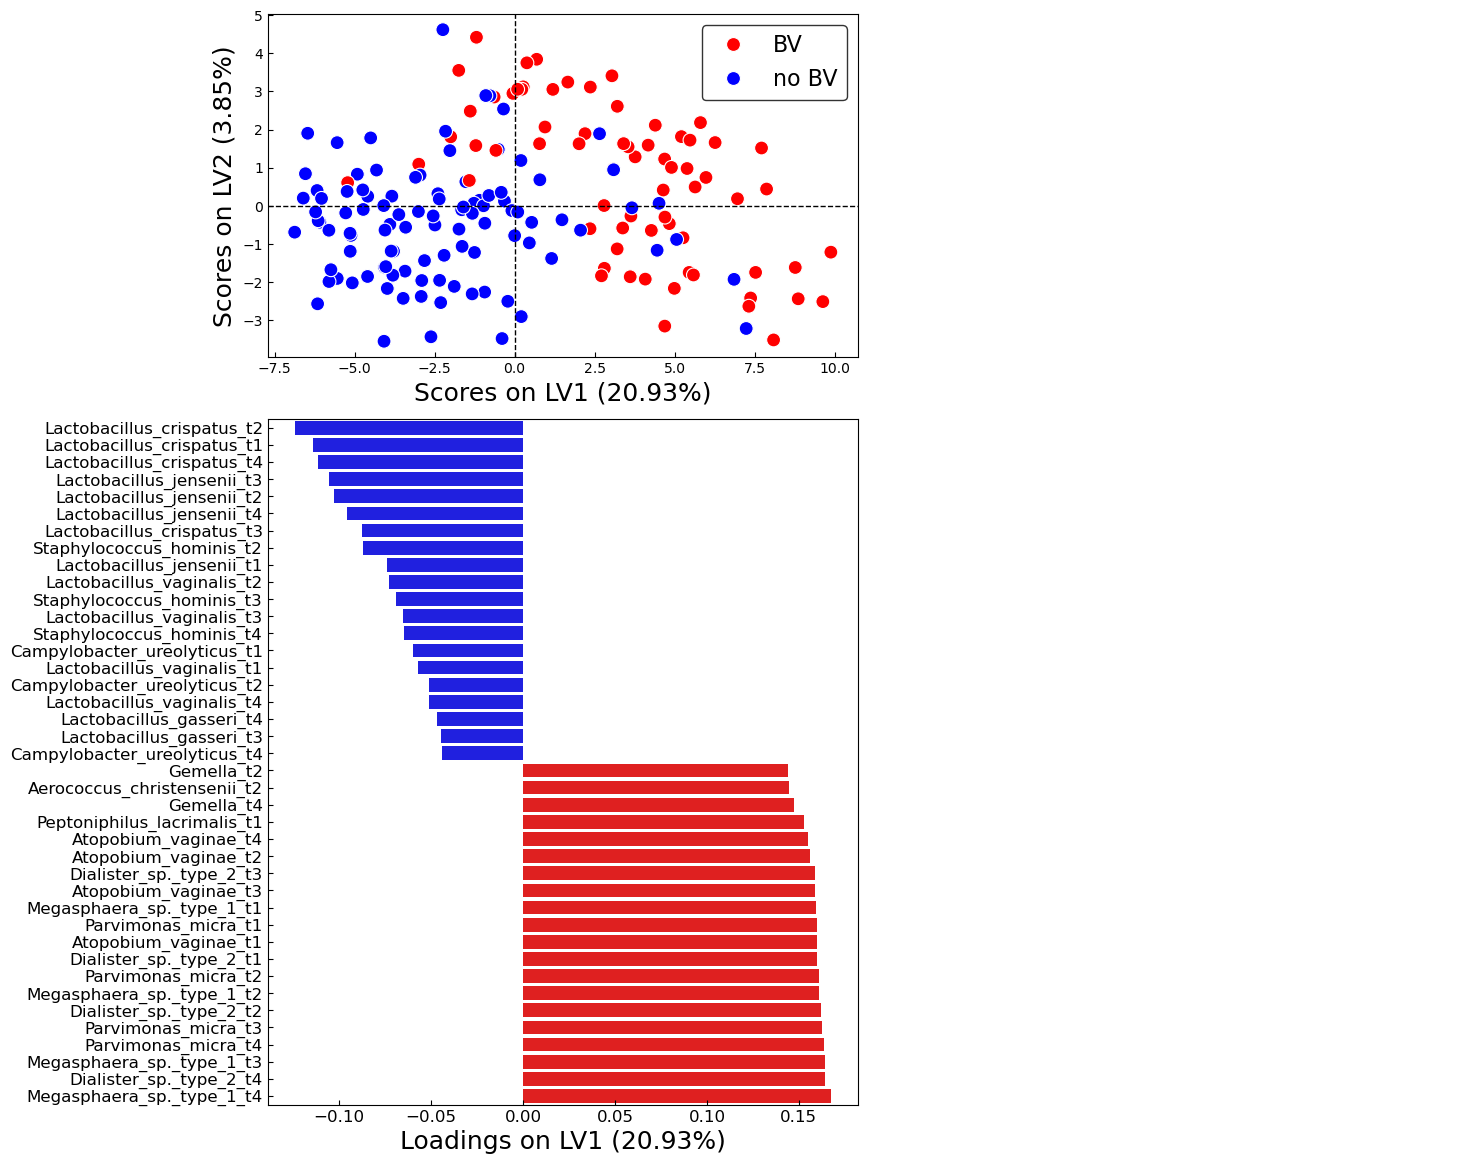

In [57]:
PLSDA_plots(df_train, y_train, num_components=2, orthogonalize=True, num_loadings=20, LV1=True, LV2=False)

# Train on HMP, test on Gajer, whole datasets use relative abundance

In [1]:
dict_rename = {'SERIAL': 'SERIAL', 'PID': 'PID', 'MENSTRUATION': 'MENSTRUATION', 'NUGENT_CLASS': 'NUGENT_CLASS', 
                        'L. crispatus': 'Lactobacillus_crispatus', 'L. jensenii': 'Lactobacillus_jensenii', 
                       'L. gasseri': 'Lactobacillus_gasseri', 'L.vaginalis': 'Lactobacillus_vaginalis','Parvimonas': 'Parvimonas_micra', 
                        'Gemella': 'Gemella', 
                       'Atopobium': 'Atopobium_vaginae', 'Corynebacterium': 'Corynebacterium_accolens',
                       'Prevotella': 'Prevotella_buccalis', 'Gardnerella': 'Gardnerella_vaginalis', 'Megasphaera': 'Megasphaera_sp._type_1', 
                       'Staphylococcus': 'Staphylococcus_hominis', 'Aerococcus':'Aerococcus_christensenii',
              'Streptococcus':'Streptococcus_anginosus','Dialister':'Dialister_sp._type_2',
              'Anaerococcus':'Anaerococcus_tetradius','Peptoniphilus':'Peptoniphilus_lacrimalis',
              'Veillonella':'Veillonella_parvula',
              'Actinomyces':'Actinomyces_neuii','Eubacterium':'Eubacterium_rectale',
              'Campylobacter':'Campylobacter_ureolyticus',
              'Varibaculum':'Varibaculum_cambriense','Mobiluncus':'Mobiluncus_mulieris',
              'Porphyromonas':'Porphyromonas_uenonis','Peptostreptococcus':'Peptostreptococcus_stomatis',
              'Bacteroides':'Bacteroides_uniformis'}

In [2]:
import warnings
# Suppress all warnings globally
warnings.filterwarnings("ignore")
from QE_functions import *
df_hmp = df_abundance_nugent(filename=None, log=False, rel_abund=True, zscore=False,cst=False, metabolomics=False)
df_gajer = Gajer_preprocessing_data(log=False, rel_abund=True, zscore=False)
#filtering: select common hmp and gajer features 
df_hmp_filtered_final, df_gajer_filtered_final = common_feature_selection_in_2_dataframes(df_hmp,df_gajer,rename_dict=dict_rename)

X_train, y_train = menstruation_xblock_y_premensesX(df_hmp_filtered_final, menses_included=False,four_labels=False, multistability=False) #X=premenses data
print(np.unique(y_train, return_counts=True))
X_train, y_train = drop_blocks(X_train,y_train,thres=4)
#(X_1, y_1), (X_2, y_2), (X_3, y_3), (X_4, y_4), (X_5, y_5) = split_blocks_by_CST_most_frequent(X, y, equal_selection=False)
df_train = flatten(X_train)

# Gajer Cohort
X_test, y_test = menstruation_xblock_y_premensesX(df_gajer_filtered_final,menses_included=False,four_labels=False, multistability=False) #X=premenses data
print(np.unique(y_test, return_counts=True))
X_test, y_test = drop_blocks(X_test,y_test,thres=4)
df_test = flatten(X_test)

relative abundance data
relative abundance data
Number of x_blocks (X): 239
Shape of labels (y): (239,)
(array([0, 1]), array([141,  98]))
Filtered number of x_blocks: 171
Filtered shape of labels (y): (171,)
Number of 1s: 69
Number of 0s: 102
Number of x_blocks (X): 116
Shape of labels (y): (116,)
(array([0, 1]), array([70, 46]))
Filtered number of x_blocks: 76
Filtered shape of labels (y): (76,)
Number of 1s: 30
Number of 0s: 46


In [3]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(df_train, y_train)
y_pred = model.predict(df_test)
y_pred

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [4]:
y_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [6]:
evaluate_classifiers(df_train, df_test, y_train, y_test)

Model  Accuracy  Precision    Recall  F1 Score  \
0                 Random Forest  0.894737   0.923077  0.800000  0.857143   
1           Logistic Regression  0.868421   0.857143  0.800000  0.827586   
2                    Linear SVM  0.842105   0.800000  0.800000  0.800000   
3                       RBF SVM  0.868421   0.857143  0.800000  0.827586   
4                           KNN  0.828947   0.774194  0.800000  0.786885   
5                          GBDT  0.684211   0.714286  0.333333  0.454545   
6                        PLS-DA  0.802632   0.714286  0.833333  0.769231   
7  Random Guess (Most Frequent)  0.605263   0.000000  0.000000  0.000000   

   Specificity       MSE       AUC  
0     0.956522  0.105263  0.882609  
1     0.913043  0.131579  0.890580  
2     0.869565  0.157895  0.884783  
3     0.913043  0.131579  0.821014  
4     0.847826  0.171053  0.894203  
5     0.913043  0.315789  0.775362  
6     0.782609  0.197368  0.775362  
7     1.000000  0.394737  0.500000

In [9]:
lstm_model_train_test(X_train, y_train, X_test, y_test, padding_value=-1000)

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 163ms/step - accuracy: 0.6986 - loss: 0.6733 - val_accuracy: 0.6053 - val_loss: 0.6487
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 142ms/step - accuracy: 0.7084 - loss: 0.9816 - val_accuracy: 0.6053 - val_loss: 0.6443
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 141ms/step - accuracy: 0.7508 - loss: 0.6259 - val_accuracy: 0.6053 - val_loss: 0.6338
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 147ms/step - accuracy: 0.7596 - loss: 0.7336 - val_accuracy: 0.6053 - val_loss: 0.6274
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 147ms/step - accuracy: 0.7851 - loss: 0.5414 - val_accuracy: 0.6053 - val_loss: 0.6365
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 154ms/step - accuracy: 0.7677 - loss: 0.5226 - val_accuracy: 0.6053 - val_loss: 0.6163
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 169ms/step - accuracy: 0.7712 - loss: 0.6029 - val_accuracy: 0.6053 - val_loss: 0.6047
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 182ms/step - accuracy: 0.7742 - loss: 0.5590 - val_accuracy: 0.6053 - v

(0.8421052631578947, 0.7931034482758621, 0.8855072463768116)

# Model with relative abundance data has the best performance between all. 

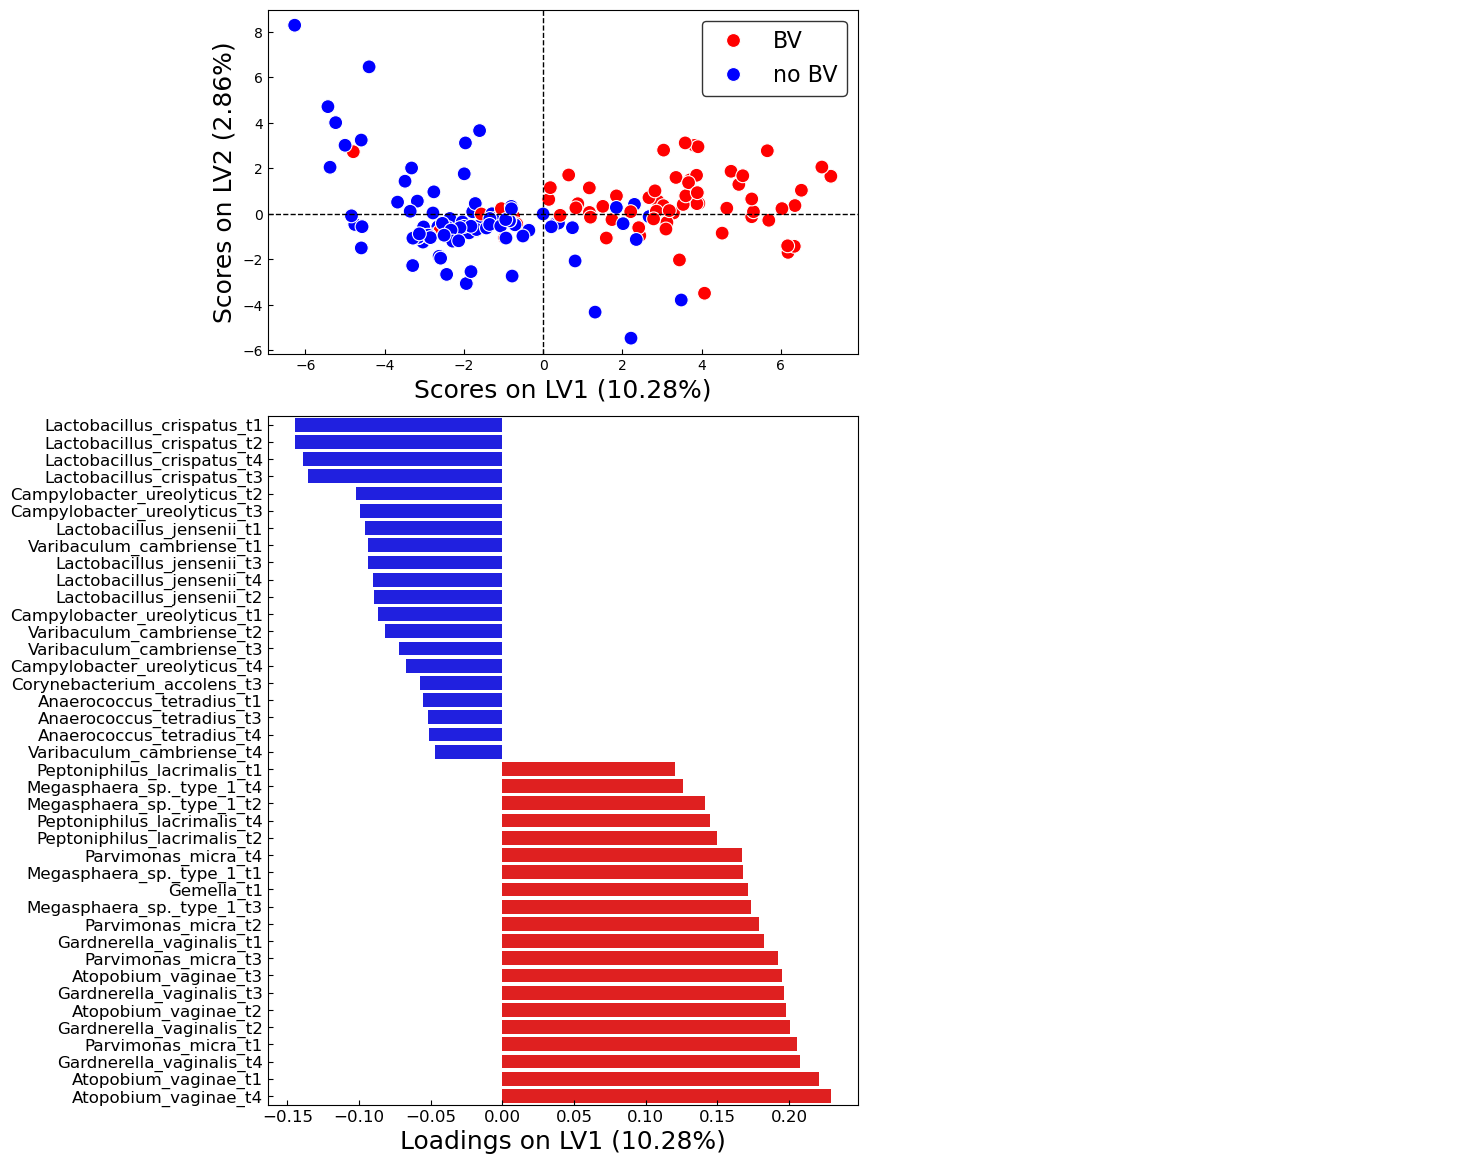

In [12]:
PLSDA_plots(df_train, y_train, num_components=2, orthogonalize=True, num_loadings=20, LV1=True, LV2=False)

# CST-IV Feature selection 

In [134]:
### list of all features common between HMP and Gajer
lst  = ['SERIAL','PID','MENSTRUATION','NUGENT_CLASS','CST_HL',
                                   'Lactobacillus_iners','Lactobacillus_crispatus',
                                   'Lactobacillus_jensenii','Lactobacillus_gasseri',
                                  'Lactobacillus_vaginalis','Parvimonas_micra',
                                  'Enterococcus_faecalis','Finegoldia_magna',
                                  'Gemella','Sneathia_sanguinegens','Atopobium_minutum',
                                  'Atopobium_vaginae','Corynebacterium_accolens',
                                  'Prevotella_bivia','Prevotella_buccalis',
                                  'Prevotella_disiens','Prevotella_melaninogenica',
                                  'Gardnerella_vaginalis','Megasphaera_sp._type_1',
                                  'Megasphaera_sp._type_2','Staphylococcus_aureus',
                                  'Staphylococcus_epidermidis','Staphylococcus_haemolyticus',
                                  'Staphylococcus_hominis','Staphylococcus_lugdunensis',
                                  'Staphylococcus_warneri','Aerococcus_christensenii',
                                  'Streptococcus_agalactiae','Streptococcus_anginosus',
                                  'Dialister_sp._type_2','Anaerococcus_tetradius',
                                  'Peptoniphilus_lacrimalis','Veillonella_montpellierensis',
                                  'Peptoniphilus_asaccharolyticus','Mobiluncus_curtisii',
                                  'Streptococcus_salivarius','Dialister_sp._type_3',
                                  'Anaerococcus_vaginalis','Peptoniphilus_harei',
                                  'Streptococcus_oralis','Streptococcus_parasanguinis',
                                  'Veillonella_parvula','Bifidobacterium_breve',
                                  'Actinomyces_neuii','Porphyromonas_bennonis',
                                  'Eubacterium_rectale','Clostridium_colicanis',
                                  'Dialister_propionicifaciens','Veillonella_atypica',
                                  'Porphyromonas_sp._type_1','Campylobacter_ureolyticus',
                                  'Varibaculum_cambriense','Fusobacterium_nucleatum',
                                  'Bifidobacterium_longum','Mobiluncus_mulieris',
                                  'Porphyromonas_uenonis','Alloscardovia_omnicolens',
                                  'Actinomyces_urogenitalis','Peptostreptococcus_stomatis',
                                  'Acinetobacter_calcoaceticus','Streptococcus_sanguinis',
                                  'Bacteroides_uniformis','Aerococcus_viridans']

# HMP data
import warnings
# Suppress all warnings globally
warnings.filterwarnings("ignore")
from QE_functions import *
df_hmp = df_abundance_nugent(filename=None, log=True, rel_abund=False, zscore=False,cst=True, metabolomics=False)
# Gajer data
df_gajer = Gajer_preprocessing_data(log=True, rel_abund=False, zscore=False)
#filtering: select all common hmp and gajer features 
df_hmp_filtered = get_columns_w_names(df_hmp,lst)
#df_hmp_filtered_only_bacteria = df_hmp_filtered.iloc[:,3:-1] #filtered data with just bacterial species

X, y = menstruation_xblock_y_premensesX(df_hmp,menses_included=False,four_labels=False, multistability=False) #X=premenses data
print(np.unique(y, return_counts=True))
X, y = drop_blocks(X,y,thres=4)
(X_1, y_1), (X_2, y_2), (X_3, y_3), (X_4, y_4), (X_5, y_5) = split_blocks_by_CST_most_frequent(X, y, equal_selection=False)
df_4 = flatten(X_4)

log transformed data
log transformed data
Number of x_blocks (X): 205
Shape of labels (y): (205,)
(array([0, 1]), array([122,  83]))
Filtered number of x_blocks: 146
Filtered shape of labels (y): (146,)
Number of 1s: 59
Number of 0s: 87
length of X_1 and y_1:  29 29
length of X_2 and y_2:  20 20
length of X_3 and y_3:  41 41
length of X_4 and y_4:  43 43
length of X_5 and y_5:  4 4


# Elastic Net Feature Selection

In [86]:
#save for elastic net
matlab_ddm_save_data(df_4,y_4)

run number: 0
run number: 1
run number: 2
run number: 3
run number: 4
run number: 5
run number: 6
run number: 7
run number: 8
run number: 9
run number: 10
run number: 11
run number: 12
run number: 13
run number: 14
run number: 15
run number: 16
run number: 17
run number: 18
run number: 19
run number: 20
run number: 21
run number: 22
run number: 23
run number: 24
run number: 25
run number: 26
run number: 27
run number: 28
run number: 29
run number: 30
run number: 31
run number: 32
run number: 33
run number: 34
run number: 35
run number: 36
run number: 37
run number: 38
run number: 39
run number: 40
run number: 41
run number: 42
run number: 43
run number: 44
run number: 45
run number: 46
run number: 47
run number: 48
run number: 49
run number: 50
run number: 51
run number: 52
run number: 53
run number: 54
run number: 55
run number: 56
run number: 57
run number: 58
run number: 59
run number: 60
run number: 61
run number: 62
run number: 63
run number: 64
run number: 65
run number: 66
run n

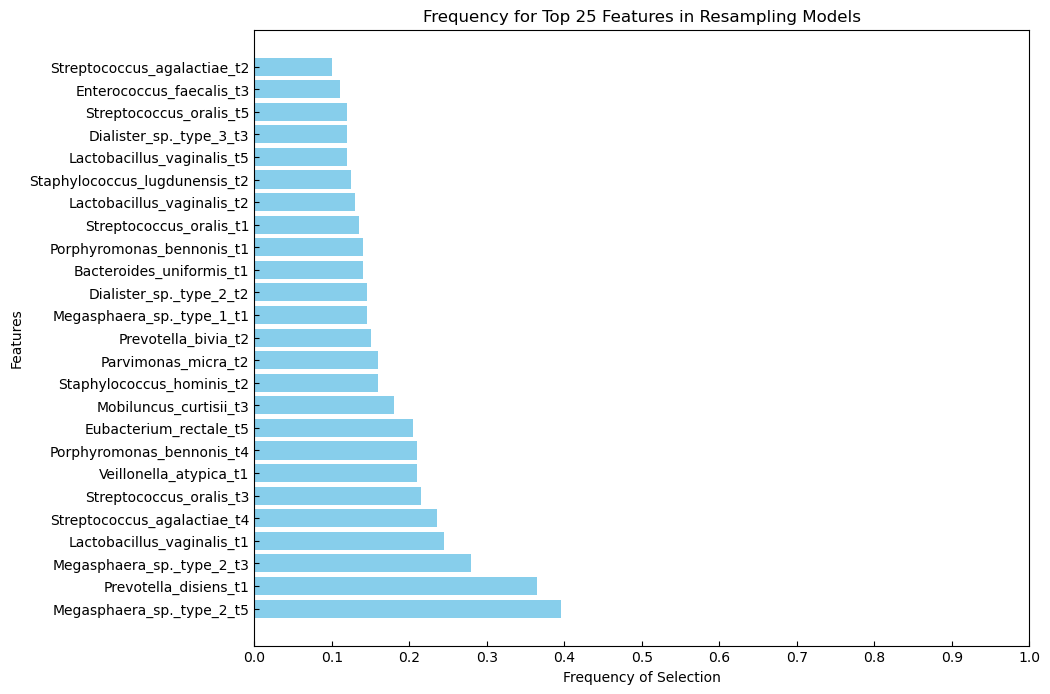

Best number of features =  24


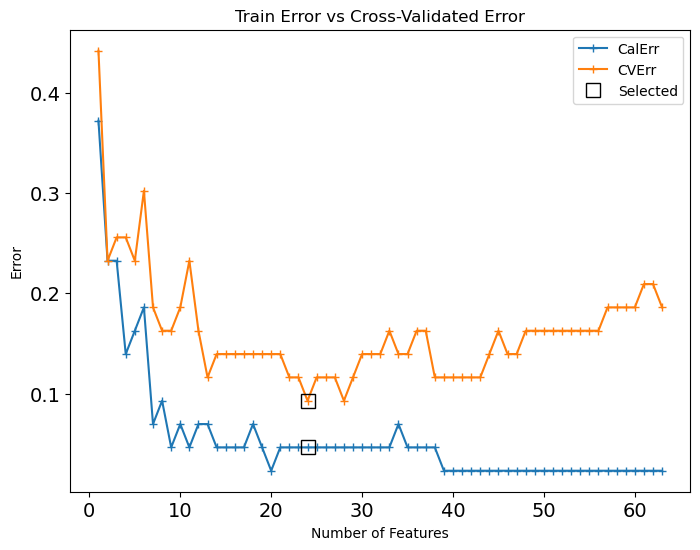

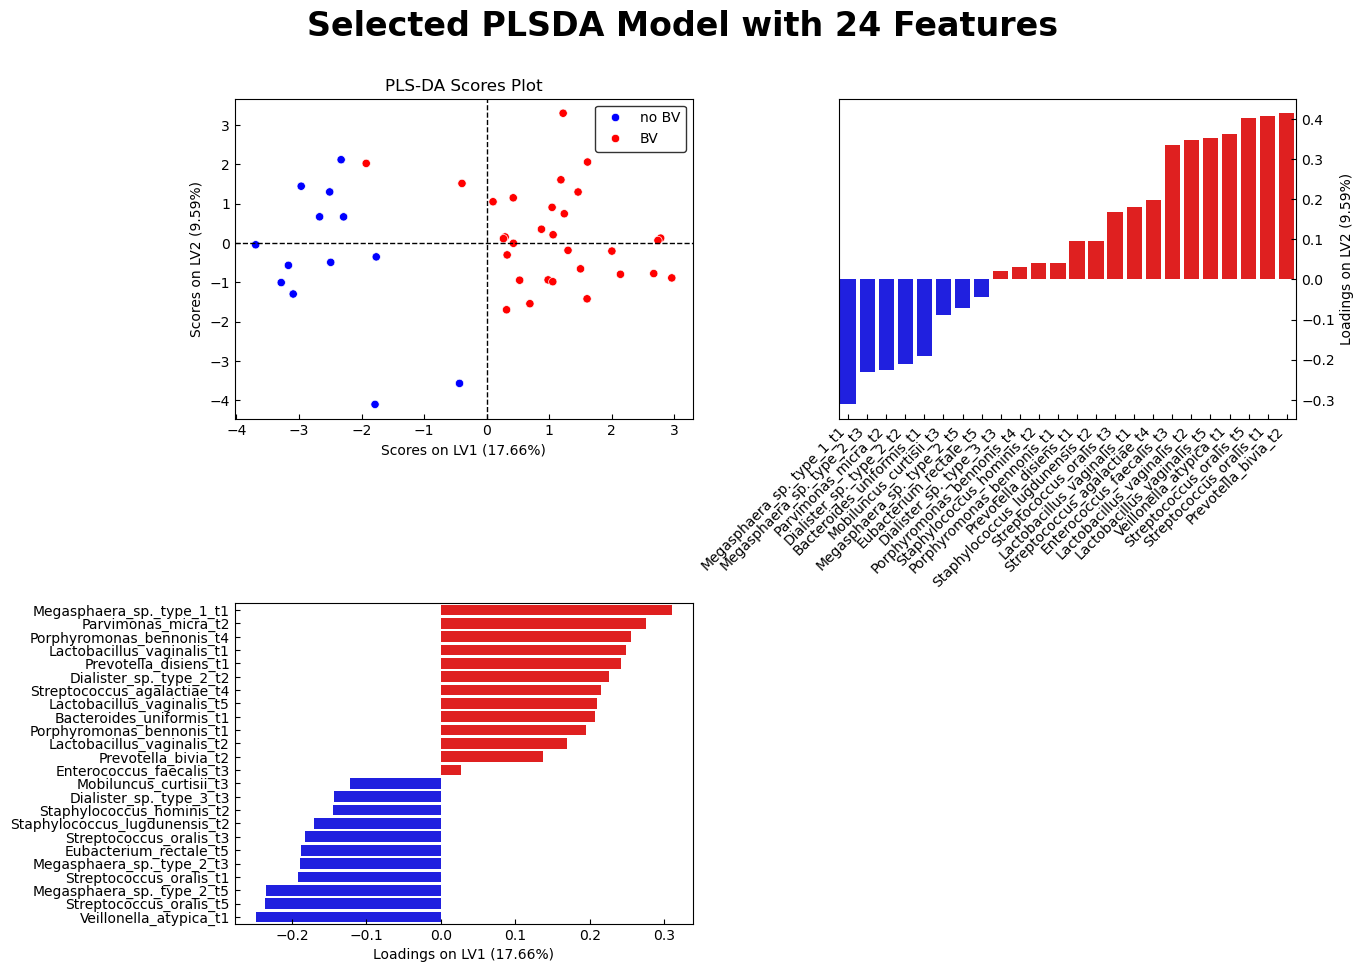

Calibration Error:  [0.04651163]
CV Error:  [0.09302326]
Random feature selections beat selected features 0.0% of the times
T-statistic: -4.226309645032587
P-value: 2.8252462719668937e-05


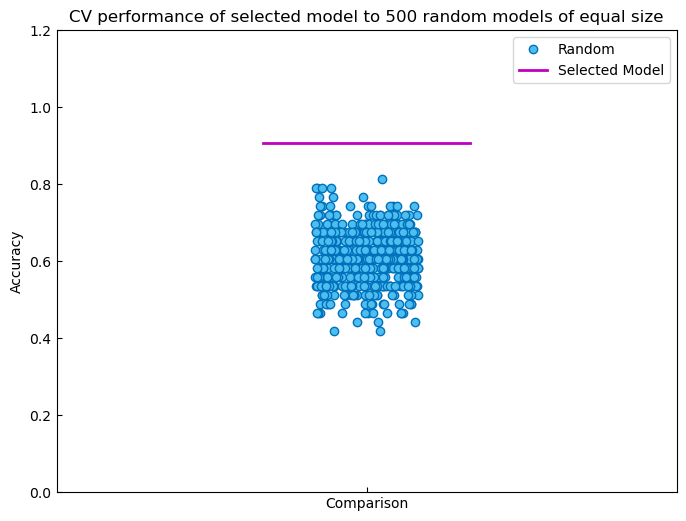

In [87]:
from Elastic_Net_functions import *
xblock, yblock, xnames, patients = read_files('HMP_common_features_w_Gajer/CST-IV')
num_runs = 200 #total number of sample subsets and iterations
all_disease_data, all_cntrl_data = resample_creation(xblock, yblock, num_runs=num_runs, r=0.8)
all_B_min = elastic_network(all_disease_data, all_cntrl_data, num_runs=num_runs) 
#a = pd.DataFrame(all_B_min)
#a.to_csv('/Users/bonakdar/Desktop/all_B_min.csv')

fr_sel_min = freq_of_selection(all_B_min,xnames)
plot_top_features(fr_sel_min,numb_of_features=25)
best_sel, tr_err_lst, te_err_lst = find_best_num_features(xblock, yblock, fr_sel_min, n_splits=5, fraction_of_features=0.2)
plot_CV_Cal_err(best_sel, tr_err_lst, te_err_lst)
PLSDA_plots(best_sel, fr_sel_min, xblock, yblock, tr_err_lst, te_err_lst, num_components=2, orthogonalize=True)
rand_CV_accuracy, CV_accuracy_sel = random_best_comparison(xblock, yblock, te_err_lst, best_sel, n_splits=5, num_rand_sets=500)
plot_cv_accuracy(rand_CV_accuracy, CV_accuracy_sel)

In [135]:
elastic_net_selected_features = fr_sel_min.index[:24]
elastic_net_selected_features

Index(['Megasphaera_sp._type_2_t5', 'Prevotella_disiens_t1',
       'Megasphaera_sp._type_2_t3', 'Lactobacillus_vaginalis_t1',
       'Streptococcus_agalactiae_t4', 'Streptococcus_oralis_t3',
       'Veillonella_atypica_t1', 'Porphyromonas_bennonis_t4',
       'Eubacterium_rectale_t5', 'Mobiluncus_curtisii_t3',
       'Staphylococcus_hominis_t2', 'Parvimonas_micra_t2',
       'Prevotella_bivia_t2', 'Megasphaera_sp._type_1_t1',
       'Dialister_sp._type_2_t2', 'Bacteroides_uniformis_t1',
       'Porphyromonas_bennonis_t1', 'Streptococcus_oralis_t1',
       'Lactobacillus_vaginalis_t2', 'Staphylococcus_lugdunensis_t2',
       'Lactobacillus_vaginalis_t5', 'Dialister_sp._type_3_t3',
       'Streptococcus_oralis_t5', 'Enterococcus_faecalis_t3'],
      dtype='object')

In [136]:
all_model_evaluation(df_4[elastic_net_selected_features],y_4,test=True,n_splits=5)

accuracy  precision  recall    f1  specificity   mse  \
Random Forest            0.79       0.83    0.93  0.87         0.47  0.21   
Logistic Regression      0.82       0.90    0.87  0.87         0.73  0.18   
Linear SVM               0.82       0.90    0.87  0.87         0.73  0.18   
RBF SVM                  0.91       0.92    0.97  0.94         0.80  0.09   
K-Nearest Neighbors      0.86       0.87    0.97  0.91         0.63  0.14   
Gradient Boosting        0.70       0.78    0.83  0.80         0.43  0.30   
PLS-DA                   0.91       0.92    0.97  0.94         0.80  0.09   
Random Guess             0.70       0.70    1.00  0.82         0.00  0.30   

                      auc  
Random Forest        0.96  
Logistic Regression  0.98  
Linear SVM           0.97  
RBF SVM              0.99  
K-Nearest Neighbors  0.98  
Gradient Boosting    0.89  
PLS-DA               0.99  
Random Guess         0.85

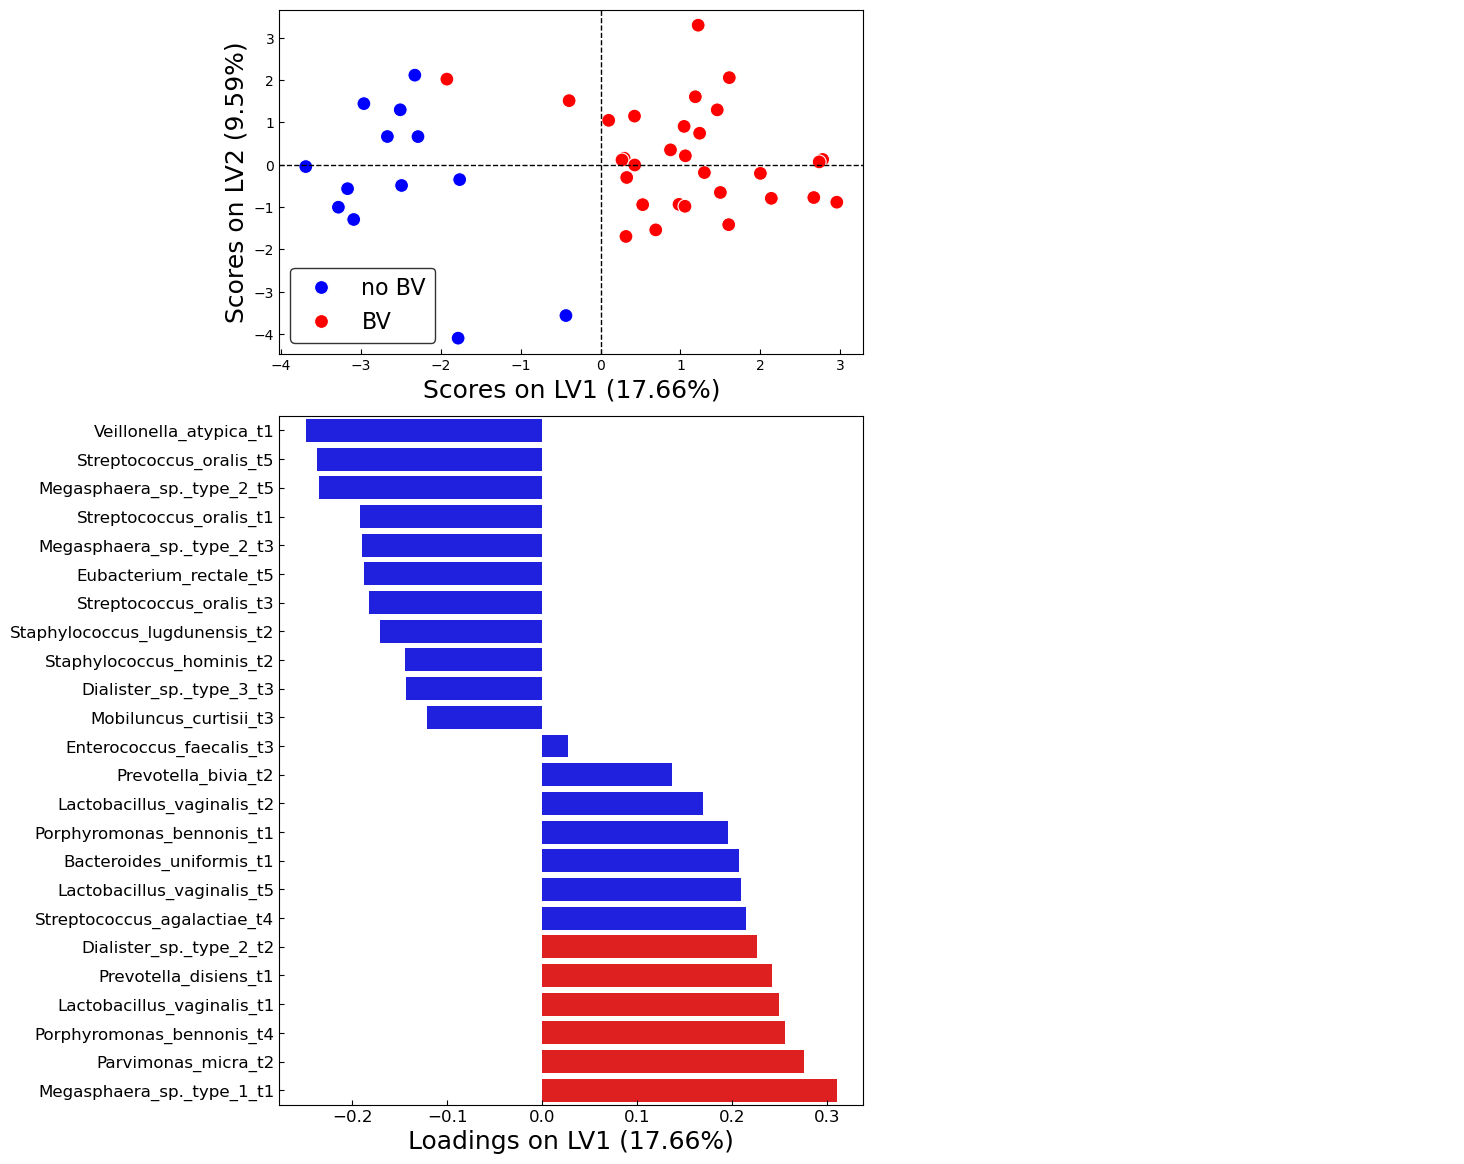

In [139]:
PLSDA_plots(df_4[elastic_net_selected_features], y_4, num_components=2, orthogonalize=True, num_loadings=20, LV1=True, LV2=False)

In [124]:
# select top 10 features using mRMR
from mrmr import mrmr_classif
mrmr_selected_features = mrmr_classif(X=df_4, y=y_4, K=10)
mrmr_selected_features

100%|█████████████████████████████████████████████| 10/10 [00:00<00:00, 65.90it/s]


['Parvimonas_micra_t2',
 'Staphylococcus_lugdunensis_t1',
 'Megasphaera_sp._type_2_t3',
 'Prevotella_bivia_t2',
 'Porphyromonas_bennonis_t4',
 'Gardnerella_vaginalis_t4',
 'Prevotella_disiens_t1',
 'Lactobacillus_vaginalis_t1',
 'Veillonella_atypica_t1',
 'Megasphaera_sp._type_2_t5']

In [125]:
#Vip 
import warnings
# Suppress all warnings globally
warnings.filterwarnings("ignore")
from QE_functions import *
model = plsda_model(df_4,y_4)
vip_features, vip_df = function_vip(df_4,y_4,model,thres=1.5)
vip_features

Cross-validated accuracies: [0.4444444444444444, 0.7777777777777778, 0.6666666666666666, 0.625, 0.625]
Mean cross-validated accuracy: 0.63


Index(['Gardnerella_vaginalis_t1', 'Atopobium_vaginae_t1',
       'Megasphaera_sp._type_1_t1', 'Peptoniphilus_lacrimalis_t1',
       'Lactobacillus_vaginalis_t1', 'Prevotella_disiens_t1',
       'Gardnerella_vaginalis_t2', 'Atopobium_vaginae_t2',
       'Parvimonas_micra_t2', 'Gardnerella_vaginalis_t3',
       'Megasphaera_sp._type_2_t3', 'Gardnerella_vaginalis_t4',
       'Streptococcus_agalactiae_t4', 'Porphyromonas_bennonis_t4',
       'Gardnerella_vaginalis_t5', 'Atopobium_vaginae_t5',
       'Megasphaera_sp._type_2_t5'],
      dtype='object')

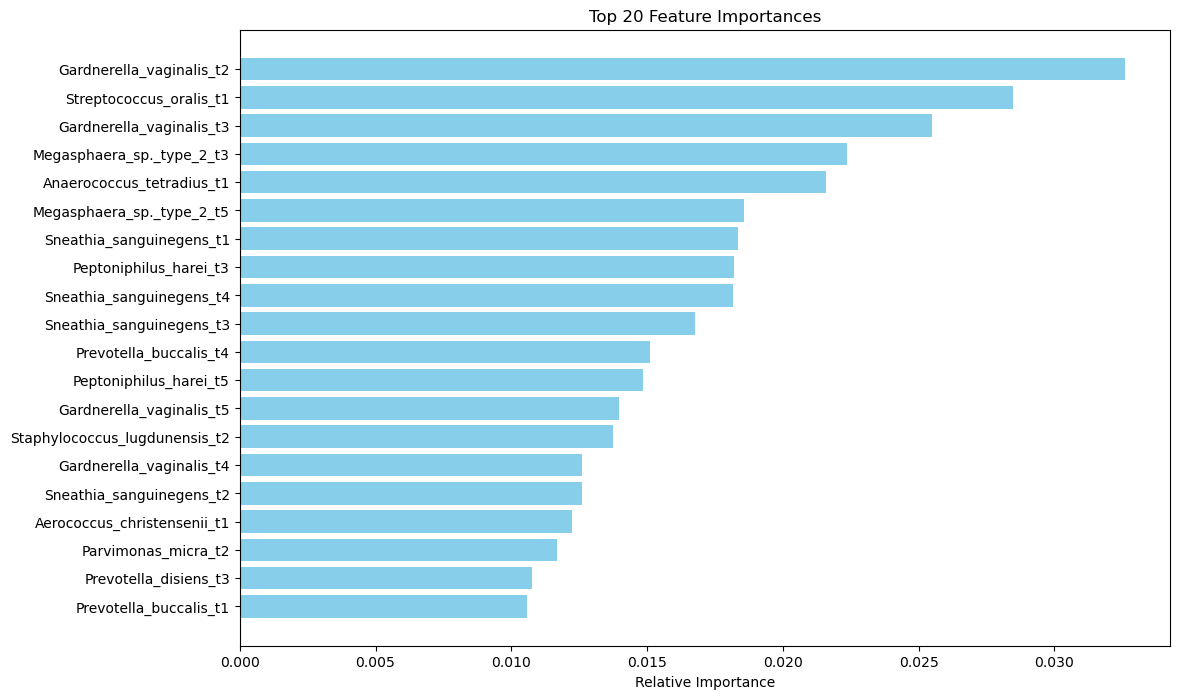

Feature  Importance
43        Gardnerella_vaginalis_t2    0.032615
31         Streptococcus_oralis_t1    0.028479
86        Gardnerella_vaginalis_t3    0.025476
94       Megasphaera_sp._type_2_t3    0.022367
15       Anaerococcus_tetradius_t1    0.021572
180      Megasphaera_sp._type_2_t5    0.018587
19        Sneathia_sanguinegens_t1    0.018357
115         Peptoniphilus_harei_t3    0.018205
148       Sneathia_sanguinegens_t4    0.018162
105       Sneathia_sanguinegens_t3    0.016778
153         Prevotella_buccalis_t4    0.015094
201         Peptoniphilus_harei_t5    0.014850
172       Gardnerella_vaginalis_t5    0.013953
55   Staphylococcus_lugdunensis_t2    0.013733
129       Gardnerella_vaginalis_t4    0.012604
62        Sneathia_sanguinegens_t2    0.012603
5      Aerococcus_christensenii_t1    0.012217
50             Parvimonas_micra_t2    0.011684
116          Prevotella_disiens_t3    0.010758
24          Prevotella_buccalis_t1    0.010595

In [126]:
#RF
RF_feature_importances = RForest_top_features_plot(df_4,y_4,numb_features=20)
RF_feature_importances[:20]

In [127]:
# Combine all the lists/arrays into a set to get unique values
common_features_set = set(elastic_net_selected_features) \
    .union(set(mrmr_selected_features)) \
    .union(set(vip_features)) \
    .union(set(RF_feature_importances['Feature'][:20].values))

common_features_set
# Convert the set back to a list
common_features = list(common_features_set)
common_features
# If you want to sort the list, you can uncomment the following line:
# common_features.sort()

# Print the list
#print(common_features)



existing_columns = [column for column in common_features2 if column in df_4.columns]

# Select only these columns from df_3
selected_columns_df = df_4[existing_columns]


In [128]:
common_features2 = [i[:-3] for i in common_features]
common_features2.extend(['SERIAL','PID','MENSTRUATION','NUGENT_CLASS','CST_HL'])
common_features2

['Staphylococcus_lugdunensis',
 'Atopobium_vaginae',
 'Prevotella_buccalis',
 'Megasphaera_sp._type_2',
 'Gardnerella_vaginalis',
 'Prevotella_disiens',
 'Aerococcus_christensenii',
 'Dialister_sp._type_3',
 'Atopobium_vaginae',
 'Lactobacillus_vaginalis',
 'Prevotella_buccalis',
 'Staphylococcus_hominis',
 'Gardnerella_vaginalis',
 'Peptoniphilus_lacrimalis',
 'Porphyromonas_bennonis',
 'Sneathia_sanguinegens',
 'Porphyromonas_bennonis',
 'Streptococcus_oralis',
 'Gardnerella_vaginalis',
 'Sneathia_sanguinegens',
 'Megasphaera_sp._type_1',
 'Lactobacillus_vaginalis',
 'Lactobacillus_vaginalis',
 'Anaerococcus_tetradius',
 'Parvimonas_micra',
 'Gardnerella_vaginalis',
 'Sneathia_sanguinegens',
 'Gardnerella_vaginalis',
 'Veillonella_atypica',
 'Sneathia_sanguinegens',
 'Streptococcus_oralis',
 'Eubacterium_rectale',
 'Prevotella_disiens',
 'Atopobium_vaginae',
 'Streptococcus_agalactiae',
 'Prevotella_bivia',
 'Dialister_sp._type_2',
 'Peptoniphilus_harei',
 'Peptoniphilus_harei',
 'Mo

In [129]:
len(common_features2)

50

In [130]:
import warnings
# Suppress all warnings globally
warnings.filterwarnings("ignore")
from QE_functions import *
df_hmp = df_abundance_nugent(filename=None, log=True, rel_abund=False, zscore=False,cst=True, metabolomics=False)
df_hmp_filtered = get_columns_w_names(df_hmp,common_features2)
#df_hmp_selected_filtered = get_columns_w_names(df_hmp,lst_either)
X, y = menstruation_xblock_y_premensesX(df_hmp_filtered,menses_included=False,four_labels=False, multistability=False) #X=premenses data
print(np.unique(y, return_counts=True))
X, y = drop_blocks(X,y,thres=4)
(X_1, y_1), (X_2, y_2), (X_3, y_3), (X_4, y_4), (X_5, y_5) = split_blocks_by_CST_most_frequent(X, y, equal_selection=False)
df_4 = flatten(X_4)
df_4

log transformed data
Number of x_blocks (X): 205
Shape of labels (y): (205,)
(array([0, 1]), array([122,  83]))
Filtered number of x_blocks: 146
Filtered shape of labels (y): (146,)
Number of 1s: 59
Number of 0s: 87
length of X_1 and y_1:  29 29
length of X_2 and y_2:  20 20
length of X_3 and y_3:  41 41
length of X_4 and y_4:  43 43
length of X_5 and y_5:  4 4


Gardnerella_vaginalis_t1  Atopobium_vaginae_t1  Megasphaera_sp._type_1_t1  \
0                   3.367296              1.791759                   0.693147   
1                  10.412201              9.617271                   1.791759   
2                  10.483858              5.998937                   4.510860   
3                   3.970292              4.890349                   2.397895   
4                   9.710388              8.388223                   6.135565   
5                   7.228388              5.105945                   3.465736   
6                  10.334978              8.146709                   6.740519   
7                   9.743847              7.897296                   6.008813   
8                   7.693482              6.902743                   4.553877   
9                   9.255314              8.496990                   8.528529   
10                  8.974365              5.049856                   2.833213   
11                  7.503290              6.694562                   7.556951   
12                  9.373224              9.837722                   1.791759   
13                  8.029759              7.260523                   7.908019   
14                  4.394449              3.433987                   2.079442   
15                -23.025851            -23.025851                 -23.025851   
16                  6.556778              5.662960                   5.468060   
17                  2.079442            -23.025851                 -23.025851   
18                  4.290459              2.944439                   2.564949   
19                 10.003423              9.087608                   4.779123   
20                  9.492356              8.985070                   5.141664   
21                  4.330733              3.218876                   1.609438   
22                  4.234107              2.397895                   1.386294   
23                 10.714084             10.330421                   1.945910   
24                  3.583519              2.564949                 -23.025851   
25                  9.342421              7.938446                   5.476464   
26                  6.548219              5.958425                   5.616771   
27                  9.884101              7.643962                   7.721349   
28                  8.315811              7.986505                   7.282761   
29                  9.852457              9.083529                   0.693147   
30                  9.696709              9.155884                   0.000000   
31                  9.612333              7.303170                   8.528529   
32                  1.791759            -23.025851                   1.098612   
33                  2.397895              1.791759                 -23.025851   
34                  2.197225              0.000000                 -23.025851   
35                  8.121183              6.198479                   4.174387   
36                  8.898502              8.138857                 -23.025851   
37                 10.127111             10.730554                   4.369448   
38                 10.218298             10.399128                   9.115260   
39                  3.332205              2.484907                   1.386294   
40                 11.070319              8.795734                   8.208492   
41                  4.158883              2.484907                   1.098612   
42                  6.887553              4.442651                 -23.025851   

    Aerococcus_christensenii_t1  Streptococcus_agalactiae_t1  \
0                      9.009325                   -23.025851   
1                      7.348588                     0.000000   
2                      5.971262                   -23.025851   
3                      1.609438                     0.000000   
4                      6.855409                     3.091042   
5                      4.615121                     6.0

In [131]:
all_model_evaluation(df_4,y_4,test=True,n_splits=5)

accuracy  precision  recall    f1  specificity   mse  \
Random Forest            0.68       0.71    0.93  0.80         0.10  0.32   
Logistic Regression      0.74       0.81    0.87  0.82         0.47  0.26   
Linear SVM               0.74       0.81    0.87  0.82         0.47  0.26   
RBF SVM                  0.72       0.76    0.90  0.82         0.33  0.28   
K-Nearest Neighbors      0.70       0.71    0.97  0.82         0.07  0.30   
Gradient Boosting        0.63       0.81    0.67  0.71         0.60  0.37   
PLS-DA                   0.72       0.74    0.93  0.82         0.23  0.28   
Random Guess             0.70       0.70    1.00  0.82         0.00  0.30   

                      auc  
Random Forest        0.86  
Logistic Regression  0.94  
Linear SVM           0.92  
RBF SVM              0.85  
K-Nearest Neighbors  0.85  
Gradient Boosting    0.85  
PLS-DA               0.89  
Random Guess         0.85

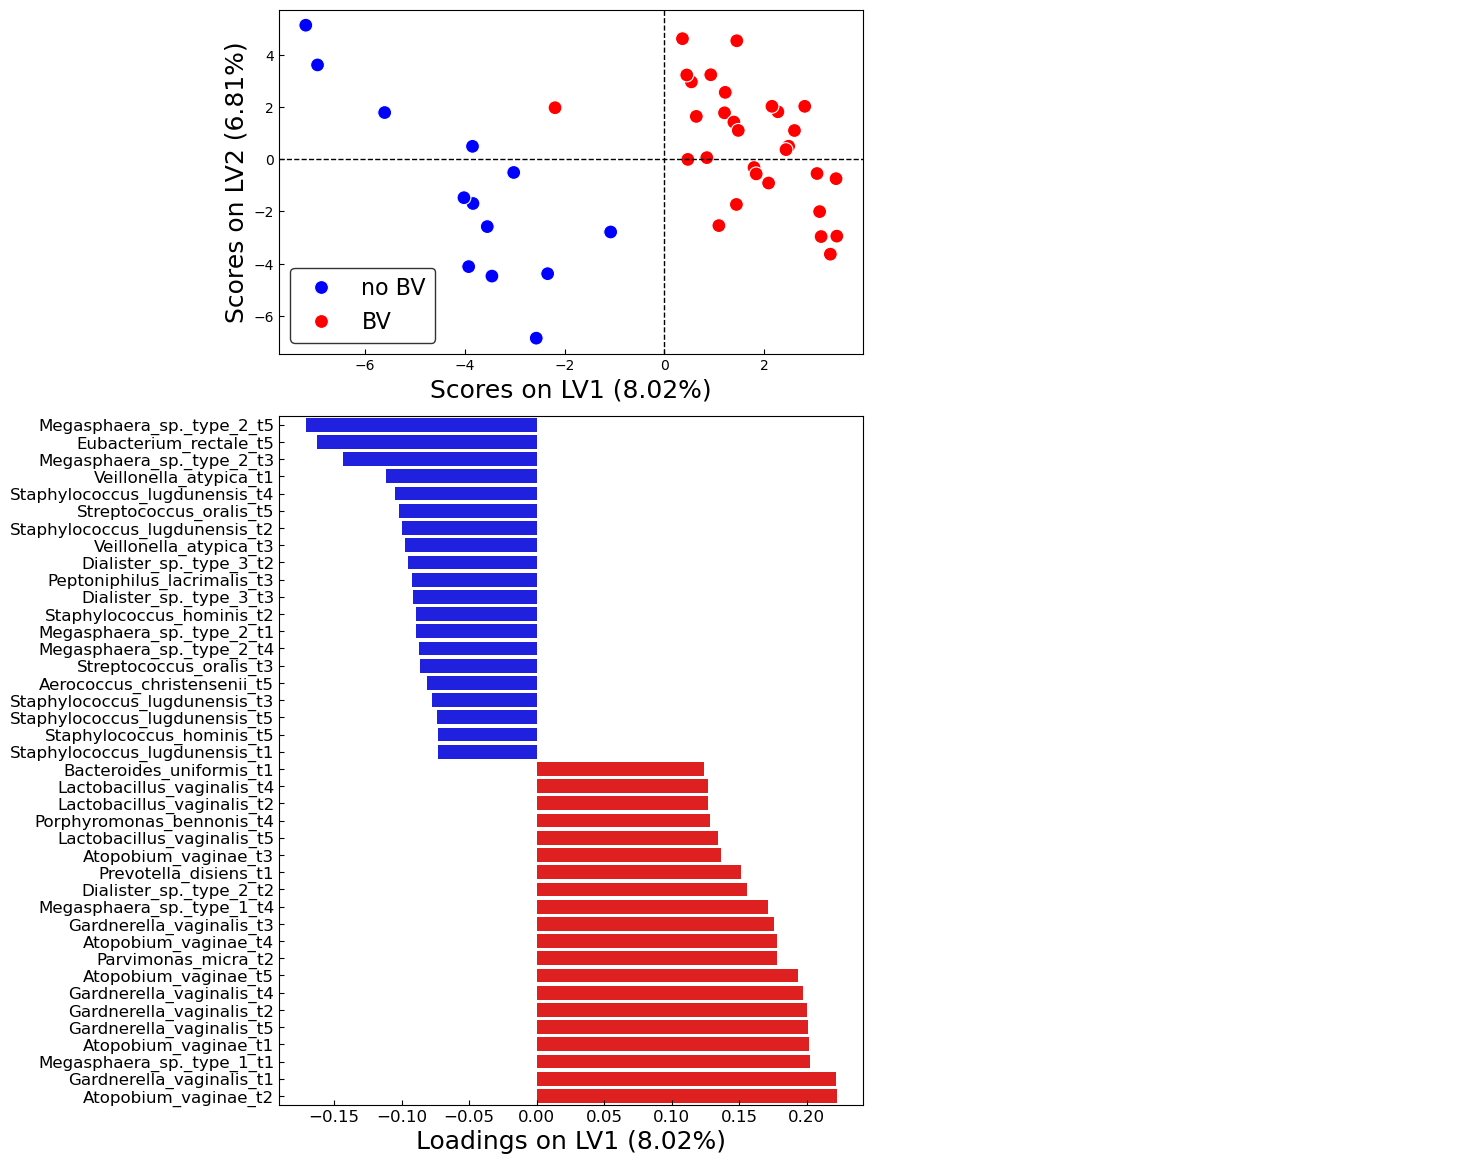

In [133]:
PLSDA_plots(df_4, y_4, num_components=2, orthogonalize=True, num_loadings=20, LV1=True, LV2=False)